# Exemples avec Jupyter Notebook et Pandas



## Exercices sur les statistiques de l'élevage bovin en Suisse et son évoluton historique

Auteur : **Pablo Iriarte, UNIGE - pablo.iriarte@unige.ch**  
Date : 10.03.2020

Ce notebook est aussi une vérification des statistiques publiées dans le livre "Bewes, Diccon. Swisscellany Facts & Figures About Switzerland. Basel: Bergli, 2012" et cité dans le blog : https://www.newlyswissed.com/counting-the-cows-of-switzerland/

![Vaches en Suisse](swisscellany_book_page_98.png)

Sources des données sur l'élevage en Suisse de bovins par canton :
* OFS (1985-2018) chiffres totales pour la Suisse : https://www.bfs.admin.ch/bfs/fr/home/statistiques/catalogues-banques-donnees/cartes.assetdetail.8346706.html
* OFS (2000-2018) chiffres par canton avec détail sur les vaches un onglet par année : https://www.bfs.admin.ch/bfs/fr/home/statistiques/agriculture-sylviculture/agriculture/structures.assetdetail.8346720.html
* OFS (1975-2018 pour le total de bovins) : https://www.bfs.admin.ch/bfs/fr/home/statistiques/agriculture-sylviculture/agriculture/structures.assetdetail.8346720.html
* HSSO (1866-1993) bovins et détails sur les vaches : https://hsso.ch/fr/2012/i/9
* DHS : https://hls-dhs-dss.ch/fr/articles/013944/2007-11-29/

Sources des données sur la population CH :
* OFS (1991-2018) : https://www.bfs.admin.ch/bfs/fr/home/statistiques/population/effectif-evolution/repartition-territoriale.assetdetail.9486040.html
* HSSO (1671-1990) : https://hsso.ch/fr/2012/b/1a

Sources des données sur la surface des cantons :
* OFS (2019) : https://www.bfs.admin.ch/bfs/fr/home/statistiques/statistique-regions/portraits-regionaux-chiffres-cles/cantons.assetdetail.7786545.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Données OFS exportés à partir de la page https://www.pxweb.bfs.admin.ch/pxweb/fr/px-x-0702000000_101/px-x-0702000000_101/px-x-0702000000_101.px
# Statistique "Emplois, exploitations agricoles, surface agricole utile (SAU) et animaux de rente selon le niveau de classification 1 par canton" Information
# Unité : Exploitation, emploi, ha, animal 
# Contact : Section Structure et analyses économiques, 058 463 62 66, e-mail: agrar@bfs.admin.ch 
# Dernière mise à jour : 28.05.2019 
# Enquête : Relevé des structures agricoles (STRU) 
# Matrice : px-x-0702000000_101 
# Base de données : OFS - STAT-TAB / Office fédéral de la statistique, 2010 Neuchâtel / Suisse / © Office fédéral de la statistique 
url_elevage_ofs_ch = ('https://www.bfs.admin.ch/bfsstatic/dam/assets/8346706/master')
url_elevage_ofs = ('https://www.bfs.admin.ch/bfsstatic/dam/assets/8346717/master')
fichier_elevage_ofs_bovins = ('px-x-0702000000_101.csv')
url_elevage_hsso = ('https://hsso.ch/get/I.09.xlsx')
url_population_ofs = ('https://www.bfs.admin.ch/bfsstatic/dam/assets/9486040/master')
url_population_hsso = ('https://hsso.ch/get/B.01a.xlsx')
url_surface_cantons_ofs = ('https://www.bfs.admin.ch/bfsstatic/dam/assets/7786545/master')

In [3]:
# fichier OFS pour les bovins : 2 lignes en trop en haut
df_elevage_ofs_bovins = pd.read_csv(fichier_elevage_ofs_bovins, sep='\t', header=0, encoding='ANSI', skiprows=2)
df_elevage_ofs_bovins

,Unité d'observation,Canton,1975,1980,1985,1990,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Cheptel - Bovins,Suisse,1845911,1903725,1848431,1858187,1747071,1672930,1640871,1608735,...,1597484,1591233,1577407,1564631,1557474,1562801,1554319,1555396,1544612,1543345
1,Cheptel - Bovins,Zürich,135307,138049,131170,123235,111798,106479,102454,98653,...,94714,95020,94598,94084,93233,95819,95114,95774,94916,93564
2,Cheptel - Bovins,Bern / Berne,349513,360129,354036,370096,345438,332142,329473,323489,...,323983,320581,317891,317048,312010,315887,308609,308843,307258,305301
3,Cheptel - Bovins,Luzern,164530,170364,170251,168279,155268,148964,144970,142710,...,150343,151076,151013,149789,149606,149205,147690,150012,149277,148319
4,Cheptel - Bovins,Uri,13559,13595,13764,15382,14572,13666,13691,13699,...,12193,12111,11685,11619,11394,11316,11911,11882,11805,11608
5,Cheptel - Bovins,Schwyz,51804,52543,53768,54231,51237,48488,47879,46970,...,44832,44669,43921,43889,43492,43325,43178,43373,42764,43380
6,Cheptel - Bovins,Obwalden,20341,19922,20772,21769,20641,19244,18943,18791,...,18088,18070,17282,17725,17614,17738,18047,18092,18244,18362
7,Cheptel - Bovins,Nidwalden,13992,13876,14591,14743,14256,13642,13528,13347,...,12469,12472,12160,12053,12120,11934,12075,11850,11987,12131
8,Cheptel - Bovins,Glarus,14668,14651,14539,14780,13732,13067,12771,12771,...,12022,11797,11694,11583,11388,11292,11591,11900,11866,11769
9,Cheptel - Bovins,Zug,22856,23870,24488,24348,21935,21041,20707,20321,...,20430,20197,20404,20327,27705,20486,20363,20498,20351,20794


In [4]:
# supprimer la première colonne qui n'es pas utile
df_elevage_ofs_bovins = df_elevage_ofs_bovins.iloc[:,1:]
df_elevage_ofs_bovins

,Canton,1975,1980,1985,1990,1996,1997,1998,1999,2000,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Suisse,1845911,1903725,1848431,1858187,1747071,1672930,1640871,1608735,1588005,...,1597484,1591233,1577407,1564631,1557474,1562801,1554319,1555396,1544612,1543345
1,Zürich,135307,138049,131170,123235,111798,106479,102454,98653,97312,...,94714,95020,94598,94084,93233,95819,95114,95774,94916,93564
2,Bern / Berne,349513,360129,354036,370096,345438,332142,329473,323489,316160,...,323983,320581,317891,317048,312010,315887,308609,308843,307258,305301
3,Luzern,164530,170364,170251,168279,155268,148964,144970,142710,141894,...,150343,151076,151013,149789,149606,149205,147690,150012,149277,148319
4,Uri,13559,13595,13764,15382,14572,13666,13691,13699,13293,...,12193,12111,11685,11619,11394,11316,11911,11882,11805,11608
5,Schwyz,51804,52543,53768,54231,51237,48488,47879,46970,46329,...,44832,44669,43921,43889,43492,43325,43178,43373,42764,43380
6,Obwalden,20341,19922,20772,21769,20641,19244,18943,18791,18561,...,18088,18070,17282,17725,17614,17738,18047,18092,18244,18362
7,Nidwalden,13992,13876,14591,14743,14256,13642,13528,13347,12940,...,12469,12472,12160,12053,12120,11934,12075,11850,11987,12131
8,Glarus,14668,14651,14539,14780,13732,13067,12771,12771,12375,...,12022,11797,11694,11583,11388,11292,11591,11900,11866,11769
9,Zug,22856,23870,24488,24348,21935,21041,20707,20321,20237,...,20430,20197,20404,20327,27705,20486,20363,20498,20351,20794


In [5]:
# indexer par Canton et transposer
df_elevage_ofs_bovins = df_elevage_ofs_bovins.set_index('Canton')
df_elevage_ofs_bovins = df_elevage_ofs_bovins.transpose()
df_elevage_ofs_bovins

Canton,Suisse,Zürich,Bern / Berne,Luzern,Uri,Schwyz,Obwalden,Nidwalden,Glarus,Zug,...,St. Gallen,Graubünden / Grigioni / Grischun,Aargau,Thurgau,Ticino,Vaud,Valais / Wallis,Neuchâtel,Genève,Jura
1975,1845911,135307,349513,164530,13559,51804,20341,13992,14668,22856,...,154952,79435,116913,104401,13279,169261,31608,40478,5215,51605
1980,1903725,138049,360129,170364,13595,52543,19922,13876,14651,23870,...,159671,80966,123857,105964,12329,168870,32523,41668,4830,56878
1985,1848431,131170,354036,170251,13764,53768,20772,14591,14539,24488,...,159925,76717,117668,98708,11584,152355,30568,40873,3752,56760
1990,1858187,123235,370096,168279,15382,54231,21769,14743,14780,24348,...,161485,88602,111527,94445,11730,145384,34448,42700,3062,59005
1996,1747071,111798,345438,155268,14572,51237,20641,14256,13732,21935,...,155999,82924,104825,85374,11867,133407,34383,41893,3425,58997
1997,1672930,106479,332142,148964,13666,48488,19244,13642,13067,21041,...,147442,79129,98911,80889,11646,129174,33417,41273,3196,56345
1998,1640871,102454,329473,144970,13691,47879,18943,13528,12771,20707,...,144312,77548,95829,78778,11361,126332,32431,41110,2885,55231
1999,1608735,98653,323489,142710,13699,46970,18791,13347,12771,20321,...,143626,77145,93038,75876,11190,122381,30880,40725,2873,56033
2000,1588005,97312,316160,141894,13293,46329,18561,12940,12375,20237,...,141836,76418,93047,75045,10988,119226,30636,39958,2660,55779
2001,1611351,97531,322256,144903,13139,46326,18723,12921,12283,20253,...,142624,76914,93597,75509,10963,121669,31092,40953,2744,57676


In [6]:
# modifier le type de l'année et renommer l'index
df_elevage_ofs_bovins = df_elevage_ofs_bovins.reset_index()
df_elevage_ofs_bovins['Year'] = df_elevage_ofs_bovins['index'].astype(int)
del df_elevage_ofs_bovins['index']
df_elevage_ofs_bovins = df_elevage_ofs_bovins.set_index('Year')
df_elevage_ofs_bovins

Canton,Suisse,Zürich,Bern / Berne,Luzern,Uri,Schwyz,Obwalden,Nidwalden,Glarus,Zug,...,St. Gallen,Graubünden / Grigioni / Grischun,Aargau,Thurgau,Ticino,Vaud,Valais / Wallis,Neuchâtel,Genève,Jura
Year,,,,,,,,,,,,,,,,,,,,,
1975,1845911,135307,349513,164530,13559,51804,20341,13992,14668,22856,...,154952,79435,116913,104401,13279,169261,31608,40478,5215,51605
1980,1903725,138049,360129,170364,13595,52543,19922,13876,14651,23870,...,159671,80966,123857,105964,12329,168870,32523,41668,4830,56878
1985,1848431,131170,354036,170251,13764,53768,20772,14591,14539,24488,...,159925,76717,117668,98708,11584,152355,30568,40873,3752,56760
1990,1858187,123235,370096,168279,15382,54231,21769,14743,14780,24348,...,161485,88602,111527,94445,11730,145384,34448,42700,3062,59005
1996,1747071,111798,345438,155268,14572,51237,20641,14256,13732,21935,...,155999,82924,104825,85374,11867,133407,34383,41893,3425,58997
1997,1672930,106479,332142,148964,13666,48488,19244,13642,13067,21041,...,147442,79129,98911,80889,11646,129174,33417,41273,3196,56345
1998,1640871,102454,329473,144970,13691,47879,18943,13528,12771,20707,...,144312,77548,95829,78778,11361,126332,32431,41110,2885,55231
1999,1608735,98653,323489,142710,13699,46970,18791,13347,12771,20321,...,143626,77145,93038,75876,11190,122381,30880,40725,2873,56033
2000,1588005,97312,316160,141894,13293,46329,18561,12940,12375,20237,...,141836,76418,93047,75045,10988,119226,30636,39958,2660,55779


In [7]:
# Renommer les cantons
df_elevage_ofs_bovins = df_elevage_ofs_bovins.rename(columns={'Suisse' : 'CH', 'Zürich' : 'ZH', 'Bern / Berne' : 'BE',
                                                              'Luzern' : 'LU', 'Uri' : 'UR', 'Schwyz' : 'SZ',
                                                              'Obwalden' : 'OW', 'Nidwalden' : 'NW', 'Glarus' : 'GL',
                                                              'Zug' : 'ZG', 'Fribourg / Freiburg' : 'FR', 'Solothurn' : 'SO',
                                                              'Basel-Stadt' : 'BS', 'Basel-Landschaft' : 'BL',
                                                              'Schaffhausen' : 'SH', 'Appenzell Ausserrhoden' : 'AR',
                                                              'Appenzell Innerrhoden' : 'AI', 'St. Gallen' : 'SG',
                                                              'Graubünden / Grigioni / Grischun' : 'GR',
                                                              'Aargau' : 'AG', 'Thurgau' : 'TG',
                                                              'Ticino' : 'TI', 'Vaud' : 'VD', 'Valais / Wallis' : 'VS',
                                                              'Neuchâtel' : 'NE', 'Genève' : 'GE', 'Jura' : 'JU'})
df_elevage_ofs_bovins

Canton,CH,ZH,BE,LU,UR,SZ,OW,NW,GL,ZG,...,SG,GR,AG,TG,TI,VD,VS,NE,GE,JU
Year,,,,,,,,,,,,,,,,,,,,,
1975,1845911,135307,349513,164530,13559,51804,20341,13992,14668,22856,...,154952,79435,116913,104401,13279,169261,31608,40478,5215,51605
1980,1903725,138049,360129,170364,13595,52543,19922,13876,14651,23870,...,159671,80966,123857,105964,12329,168870,32523,41668,4830,56878
1985,1848431,131170,354036,170251,13764,53768,20772,14591,14539,24488,...,159925,76717,117668,98708,11584,152355,30568,40873,3752,56760
1990,1858187,123235,370096,168279,15382,54231,21769,14743,14780,24348,...,161485,88602,111527,94445,11730,145384,34448,42700,3062,59005
1996,1747071,111798,345438,155268,14572,51237,20641,14256,13732,21935,...,155999,82924,104825,85374,11867,133407,34383,41893,3425,58997
1997,1672930,106479,332142,148964,13666,48488,19244,13642,13067,21041,...,147442,79129,98911,80889,11646,129174,33417,41273,3196,56345
1998,1640871,102454,329473,144970,13691,47879,18943,13528,12771,20707,...,144312,77548,95829,78778,11361,126332,32431,41110,2885,55231
1999,1608735,98653,323489,142710,13699,46970,18791,13347,12771,20321,...,143626,77145,93038,75876,11190,122381,30880,40725,2873,56033
2000,1588005,97312,316160,141894,13293,46329,18561,12940,12375,20237,...,141836,76418,93047,75045,10988,119226,30636,39958,2660,55779


In [8]:
# fichier HSSO pour les bovins : 35 lignes en trop en haut
df_elevage_hsso_bovins = pd.read_excel(url_elevage_hsso, skiprows=6, nrows=25)
# fichier HSSO pour les vaches : 6 lignes en trop en haut
df_elevage_hsso_vaches = pd.read_excel(url_elevage_hsso, skiprows=35, nrows=25)
df_elevage_hsso_bovins

,Jahr,ZH,"BE, JU",BE,LU,UR,SZ,OW,NW,GL,...,AG,TG,TI,VD,VS,NE,GE,JU,CH,Année
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1866.0,70199.0,195327.0,NaN,65349.0,11107.0,23473.0,8988.0,6026.0,9208.0,...,62938.0,34719.0,45020.0,77646.0,62617.0,19109.0,7954.0,NaN,982133.0,1866.0
2,1876.0,74627.0,216702.0,NaN,70739.0,9220.0,25922.0,9024.0,6258.0,9606.0,...,62295.0,35603.0,44188.0,77243.0,65024.0,19469.0,6949.0,NaN,1035856.0,1876.0
3,1886.0,88637.0,258153.0,NaN,85807.0,12193.0,30661.0,10358.0,7468.0,11307.0,...,74642.0,47332.0,50475.0,91141.0,70089.0,22230.0,7187.0,NaN,1212538.0,1886.0
4,1896.0,102292.0,276409.0,NaN,97742.0,12042.0,32277.0,11161.0,8036.0,10906.0,...,82034.0,56991.0,42944.0,99056.0,65654.0,23960.0,8121.0,NaN,1306696.0,1896.0
5,1901.0,100602.0,293862.0,NaN,106603.0,12064.0,32586.0,11855.0,8383.0,11501.0,...,82268.0,52701.0,42668.0,96975.0,71659.0,22723.0,8106.0,NaN,1340375.0,1901.0
6,1906.0,112256.0,327427.0,NaN,114487.0,13119.0,36288.0,14233.0,9466.0,12309.0,...,94454.0,63469.0,43654.0,115576.0,75562.0,26438.0,9091.0,NaN,1498144.0,1906.0
7,1911.0,111034.0,316868.0,NaN,113034.0,12089.0,34208.0,13053.0,8616.0,11363.0,...,93354.0,67267.0,41800.0,108210.0,68481.0,25782.0,8378.0,NaN,1443483.0,1911.0
8,1916.0,122574.0,353095.0,NaN,122088.0,12940.0,37506.0,14763.0,9822.0,12819.0,...,101943.0,77056.0,41997.0,130801.0,80273.0,29434.0,9631.0,NaN,1615893.0,1916.0
9,1918.0,116146.0,332804.0,NaN,117060.0,12925.0,36812.0,14554.0,9690.0,12379.0,...,96971.0,69989.0,40200.0,120684.0,76501.0,27510.0,7893.0,NaN,1530522.0,1918.0


In [9]:
df_elevage_hsso_vaches

,Jahr,ZH,"BE, JU",BE,LU,UR,SZ,OW,NW,GL,...,AG,TG,TI,VD,VS,NE,GE,JU,CH,Année
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1866.0,42983.0,111657.0,NaN,35282.0,5969.0,11135.0,5297.0,3893.0,6014.0,...,34787.0,20735.0,20394.0,44821.0,35719.0,11589.0,6245.0,NaN,552427.0,1866.0
2,1876.0,44772.0,127109.0,NaN,39775.0,5223.0,11405.0,5314.0,3929.0,6271.0,...,35384.0,22154.0,27047.0,43874.0,36392.0,12002.0,5608.0,NaN,592413.0,1876.0
3,1886.0,50938.0,142799.0,NaN,48582.0,5943.0,13086.0,5520.0,4520.0,6881.0,...,39156.0,28081.0,28735.0,50267.0,37056.0,13106.0,5736.0,NaN,663102.0,1886.0
4,1896.0,53011.0,147110.0,NaN,55201.0,5725.0,13632.0,5453.0,4629.0,6259.0,...,40489.0,29828.0,24820.0,54848.0,33691.0,12823.0,6299.0,NaN,688052.0,1896.0
5,1901.0,56071.0,160735.0,NaN,65224.0,5767.0,14140.0,5953.0,4708.0,6698.0,...,43836.0,32896.0,25622.0,55506.0,38027.0,12975.0,6586.0,NaN,739922.0,1901.0
6,1906.0,59133.0,169105.0,NaN,69021.0,5914.0,15190.0,6644.0,5207.0,6611.0,...,47242.0,38096.0,23177.0,62819.0,38373.0,14139.0,6670.0,NaN,785950.0,1906.0
7,1911.0,61400.0,172111.0,NaN,73148.0,5596.0,15418.0,6550.0,4796.0,6109.0,...,49583.0,42832.0,23105.0,61877.0,34879.0,14222.0,6391.0,NaN,796909.0,1911.0
8,1916.0,65145.0,182218.0,NaN,75234.0,5909.0,15751.0,7205.0,5215.0,6723.0,...,52462.0,45964.0,23468.0,69660.0,39267.0,15544.0,6555.0,NaN,849011.0,1916.0
9,1918.0,60358.0,166972.0,NaN,68598.0,6167.0,15514.0,6895.0,5052.0,6390.0,...,48678.0,42313.0,22405.0,60515.0,38925.0,14109.0,4996.0,NaN,786565.0,1918.0


In [10]:
# supprimer la première ligne inutile
df_elevage_hsso_bovins = df_elevage_hsso_bovins.iloc[1:]
df_elevage_hsso_vaches = df_elevage_hsso_vaches.iloc[1:]
df_elevage_hsso_bovins

,Jahr,ZH,"BE, JU",BE,LU,UR,SZ,OW,NW,GL,...,AG,TG,TI,VD,VS,NE,GE,JU,CH,Année
1,1866.0,70199.0,195327.0,NaN,65349.0,11107.0,23473.0,8988.0,6026.0,9208.0,...,62938.0,34719.0,45020.0,77646.0,62617.0,19109.0,7954.0,NaN,982133.0,1866.0
2,1876.0,74627.0,216702.0,NaN,70739.0,9220.0,25922.0,9024.0,6258.0,9606.0,...,62295.0,35603.0,44188.0,77243.0,65024.0,19469.0,6949.0,NaN,1035856.0,1876.0
3,1886.0,88637.0,258153.0,NaN,85807.0,12193.0,30661.0,10358.0,7468.0,11307.0,...,74642.0,47332.0,50475.0,91141.0,70089.0,22230.0,7187.0,NaN,1212538.0,1886.0
4,1896.0,102292.0,276409.0,NaN,97742.0,12042.0,32277.0,11161.0,8036.0,10906.0,...,82034.0,56991.0,42944.0,99056.0,65654.0,23960.0,8121.0,NaN,1306696.0,1896.0
5,1901.0,100602.0,293862.0,NaN,106603.0,12064.0,32586.0,11855.0,8383.0,11501.0,...,82268.0,52701.0,42668.0,96975.0,71659.0,22723.0,8106.0,NaN,1340375.0,1901.0
6,1906.0,112256.0,327427.0,NaN,114487.0,13119.0,36288.0,14233.0,9466.0,12309.0,...,94454.0,63469.0,43654.0,115576.0,75562.0,26438.0,9091.0,NaN,1498144.0,1906.0
7,1911.0,111034.0,316868.0,NaN,113034.0,12089.0,34208.0,13053.0,8616.0,11363.0,...,93354.0,67267.0,41800.0,108210.0,68481.0,25782.0,8378.0,NaN,1443483.0,1911.0
8,1916.0,122574.0,353095.0,NaN,122088.0,12940.0,37506.0,14763.0,9822.0,12819.0,...,101943.0,77056.0,41997.0,130801.0,80273.0,29434.0,9631.0,NaN,1615893.0,1916.0
9,1918.0,116146.0,332804.0,NaN,117060.0,12925.0,36812.0,14554.0,9690.0,12379.0,...,96971.0,69989.0,40200.0,120684.0,76501.0,27510.0,7893.0,NaN,1530522.0,1918.0
10,1921.0,108854.0,316320.0,NaN,111747.0,11242.0,34487.0,13238.0,9548.0,11981.0,...,91364.0,65842.0,35815.0,109593.0,67652.0,25274.0,7174.0,NaN,1425341.0,1921.0


In [11]:
# suppriner la dernière colonne et transformer l'année en int
del df_elevage_hsso_bovins['Année']
del df_elevage_hsso_vaches['Année']
df_elevage_hsso_bovins['Year'] = df_elevage_hsso_bovins['Jahr'].astype(int)
df_elevage_hsso_vaches['Year'] = df_elevage_hsso_vaches['Jahr'].astype(int)
del df_elevage_hsso_bovins['Jahr']
del df_elevage_hsso_vaches['Jahr']
df_elevage_hsso_bovins = df_elevage_hsso_bovins.set_index('Year')
df_elevage_hsso_vaches = df_elevage_hsso_vaches.set_index('Year')
df_elevage_hsso_bovins

C:\Users\iriarte\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\iriarte\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ZH,"BE, JU",BE,LU,UR,SZ,OW,NW,GL,ZG,...,GR,AG,TG,TI,VD,VS,NE,GE,JU,CH
Year,,,,,,,,,,,,,,,,,,,,,
1866,70199.0,195327.0,NaN,65349.0,11107.0,23473.0,8988.0,6026.0,9208.0,7226.0,...,82356.0,62938.0,34719.0,45020.0,77646.0,62617.0,19109.0,7954.0,NaN,982133.0
1876,74627.0,216702.0,NaN,70739.0,9220.0,25922.0,9024.0,6258.0,9606.0,8074.0,...,78075.0,62295.0,35603.0,44188.0,77243.0,65024.0,19469.0,6949.0,NaN,1035856.0
1886,88637.0,258153.0,NaN,85807.0,12193.0,30661.0,10358.0,7468.0,11307.0,10437.0,...,77748.0,74642.0,47332.0,50475.0,91141.0,70089.0,22230.0,7187.0,NaN,1212538.0
1896,102292.0,276409.0,NaN,97742.0,12042.0,32277.0,11161.0,8036.0,10906.0,11598.0,...,76448.0,82034.0,56991.0,42944.0,99056.0,65654.0,23960.0,8121.0,NaN,1306696.0
1901,100602.0,293862.0,NaN,106603.0,12064.0,32586.0,11855.0,8383.0,11501.0,12293.0,...,77861.0,82268.0,52701.0,42668.0,96975.0,71659.0,22723.0,8106.0,NaN,1340375.0
1906,112256.0,327427.0,NaN,114487.0,13119.0,36288.0,14233.0,9466.0,12309.0,13589.0,...,83347.0,94454.0,63469.0,43654.0,115576.0,75562.0,26438.0,9091.0,NaN,1498144.0
1911,111034.0,316868.0,NaN,113034.0,12089.0,34208.0,13053.0,8616.0,11363.0,13465.0,...,78499.0,93354.0,67267.0,41800.0,108210.0,68481.0,25782.0,8378.0,NaN,1443483.0
1916,122574.0,353095.0,NaN,122088.0,12940.0,37506.0,14763.0,9822.0,12819.0,14901.0,...,88308.0,101943.0,77056.0,41997.0,130801.0,80273.0,29434.0,9631.0,NaN,1615893.0
1918,116146.0,332804.0,NaN,117060.0,12925.0,36812.0,14554.0,9690.0,12379.0,14884.0,...,84365.0,96971.0,69989.0,40200.0,120684.0,76501.0,27510.0,7893.0,NaN,1530522.0


In [12]:
# attribution à BE des valeurs de BE,JU et suppression de la colonne
df_elevage_hsso_bovins.loc[df_elevage_hsso_bovins['BE'].isnull(), 'BE'] = df_elevage_hsso_bovins['BE, JU']
df_elevage_hsso_vaches.loc[df_elevage_hsso_vaches['BE'].isnull(), 'BE'] = df_elevage_hsso_vaches['BE, JU']
del df_elevage_hsso_bovins['BE, JU']
del df_elevage_hsso_vaches['BE, JU']
df_elevage_hsso_bovins

,ZH,BE,LU,UR,SZ,OW,NW,GL,ZG,FR,...,GR,AG,TG,TI,VD,VS,NE,GE,JU,CH
Year,,,,,,,,,,,,,,,,,,,,,
1866,70199.0,195327.0,65349.0,11107.0,23473.0,8988.0,6026.0,9208.0,7226.0,48659.0,...,82356.0,62938.0,34719.0,45020.0,77646.0,62617.0,19109.0,7954.0,NaN,982133.0
1876,74627.0,216702.0,70739.0,9220.0,25922.0,9024.0,6258.0,9606.0,8074.0,64515.0,...,78075.0,62295.0,35603.0,44188.0,77243.0,65024.0,19469.0,6949.0,NaN,1035856.0
1886,88637.0,258153.0,85807.0,12193.0,30661.0,10358.0,7468.0,11307.0,10437.0,77604.0,...,77748.0,74642.0,47332.0,50475.0,91141.0,70089.0,22230.0,7187.0,NaN,1212538.0
1896,102292.0,276409.0,97742.0,12042.0,32277.0,11161.0,8036.0,10906.0,11598.0,88096.0,...,76448.0,82034.0,56991.0,42944.0,99056.0,65654.0,23960.0,8121.0,NaN,1306696.0
1901,100602.0,293862.0,106603.0,12064.0,32586.0,11855.0,8383.0,11501.0,12293.0,90672.0,...,77861.0,82268.0,52701.0,42668.0,96975.0,71659.0,22723.0,8106.0,NaN,1340375.0
1906,112256.0,327427.0,114487.0,13119.0,36288.0,14233.0,9466.0,12309.0,13589.0,106408.0,...,83347.0,94454.0,63469.0,43654.0,115576.0,75562.0,26438.0,9091.0,NaN,1498144.0
1911,111034.0,316868.0,113034.0,12089.0,34208.0,13053.0,8616.0,11363.0,13465.0,101796.0,...,78499.0,93354.0,67267.0,41800.0,108210.0,68481.0,25782.0,8378.0,NaN,1443483.0
1916,122574.0,353095.0,122088.0,12940.0,37506.0,14763.0,9822.0,12819.0,14901.0,117010.0,...,88308.0,101943.0,77056.0,41997.0,130801.0,80273.0,29434.0,9631.0,NaN,1615893.0
1918,116146.0,332804.0,117060.0,12925.0,36812.0,14554.0,9690.0,12379.0,14884.0,113634.0,...,84365.0,96971.0,69989.0,40200.0,120684.0,76501.0,27510.0,7893.0,NaN,1530522.0


In [13]:
# fusion de deux fichiers
df_elevage_bovins = pd.concat([df_elevage_hsso_bovins, df_elevage_ofs_bovins]).sort_index()
df_elevage_bovins

C:\Users\iriarte\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,AG,AI,AR,BE,BL,BS,CH,FR,GE,GL,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
Year,,,,,,,,,,,,,,,,,,,,,
1866,62938.0,6748.0,14963.0,195327.0,14043.0,1644.0,982133.0,48659.0,7954.0,9208.0,...,8901.0,28315.0,23473.0,34719.0,45020.0,11107.0,77646.0,62617.0,7226.0,70199.0
1876,62295.0,7733.0,17244.0,216702.0,14739.0,1961.0,1035856.0,64515.0,6949.0,9606.0,...,9060.0,28918.0,25922.0,35603.0,44188.0,9220.0,77243.0,65024.0,8074.0,74627.0
1886,74642.0,7722.0,18729.0,258153.0,17670.0,2211.0,1212538.0,77604.0,7187.0,11307.0,...,10505.0,33835.0,30661.0,47332.0,50475.0,12193.0,91141.0,70089.0,10437.0,88637.0
1896,82034.0,8998.0,20621.0,276409.0,19912.0,1958.0,1306696.0,88096.0,8121.0,10906.0,...,11654.0,36178.0,32277.0,56991.0,42944.0,12042.0,99056.0,65654.0,11598.0,102292.0
1901,82268.0,9497.0,21065.0,293862.0,19739.0,1572.0,1340375.0,90672.0,8106.0,11501.0,...,10627.0,37935.0,32586.0,52701.0,42668.0,12064.0,96975.0,71659.0,12293.0,100602.0
1906,94454.0,10257.0,22331.0,327427.0,24376.0,1723.0,1498144.0,106408.0,9091.0,12309.0,...,12582.0,44434.0,36288.0,63469.0,43654.0,13119.0,115576.0,75562.0,13589.0,112256.0
1911,93354.0,9597.0,20602.0,316868.0,23011.0,1523.0,1443483.0,101796.0,8378.0,11363.0,...,12503.0,42437.0,34208.0,67267.0,41800.0,12089.0,108210.0,68481.0,13465.0,111034.0
1916,101943.0,10409.0,21666.0,353095.0,26357.0,1628.0,1615893.0,117010.0,9631.0,12819.0,...,13512.0,47565.0,37506.0,77056.0,41997.0,12940.0,130801.0,80273.0,14901.0,122574.0
1918,96971.0,10046.0,20181.0,332804.0,23249.0,1437.0,1530522.0,113634.0,7893.0,12379.0,...,13200.0,43306.0,36812.0,69989.0,40200.0,12925.0,120684.0,76501.0,14884.0,116146.0


In [14]:
# ajouter les années manquantes
df_elevage_bovins2 = df_elevage_bovins.reindex(range(1866, 2019))
df_elevage_bovins2

,AG,AI,AR,BE,BL,BS,CH,FR,GE,GL,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
Year,,,,,,,,,,,,,,,,,,,,,
1866,62938.0,6748.0,14963.0,195327.0,14043.0,1644.0,982133.0,48659.0,7954.0,9208.0,...,8901.0,28315.0,23473.0,34719.0,45020.0,11107.0,77646.0,62617.0,7226.0,70199.0
1867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# ajouter une interpolation linaire pour remplir les vides
df_elevage_bovins3 = df_elevage_bovins2.interpolate(method='linear', axis=0)
df_elevage_bovins3

,AG,AI,AR,BE,BL,BS,CH,FR,GE,GL,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
Year,,,,,,,,,,,,,,,,,,,,,
1866,62938.0,6748.000000,14963.000000,195327.000000,14043.000000,1644.000000,9.821330e+05,48659.000000,7954.000000,9208.000000,...,8901.000000,28315.000000,23473.000000,34719.000000,45020.000000,11107.000000,77646.000000,62617.000000,7226.000000,70199.000000
1867,62873.7,6846.500000,15191.100000,197464.500000,14112.600000,1675.700000,9.875053e+05,50244.600000,7853.500000,9247.800000,...,8916.900000,28375.300000,23717.900000,34807.400000,44936.800000,10918.300000,77605.700000,62857.700000,7310.800000,70641.800000
1868,62809.4,6945.000000,15419.200000,199602.000000,14182.200000,1707.400000,9.928776e+05,51830.200000,7753.000000,9287.600000,...,8932.800000,28435.600000,23962.800000,34895.800000,44853.600000,10729.600000,77565.400000,63098.400000,7395.600000,71084.600000
1869,62745.1,7043.500000,15647.300000,201739.500000,14251.800000,1739.100000,9.982499e+05,53415.800000,7652.500000,9327.400000,...,8948.700000,28495.900000,24207.700000,34984.200000,44770.400000,10540.900000,77525.100000,63339.100000,7480.400000,71527.400000
1870,62680.8,7142.000000,15875.400000,203877.000000,14321.400000,1770.800000,1.003622e+06,55001.400000,7552.000000,9367.200000,...,8964.600000,28556.200000,24452.600000,35072.600000,44687.200000,10352.200000,77484.800000,63579.800000,7565.200000,71970.200000
1871,62616.5,7240.500000,16103.500000,206014.500000,14391.000000,1802.500000,1.008994e+06,56587.000000,7451.500000,9407.000000,...,8980.500000,28616.500000,24697.500000,35161.000000,44604.000000,10163.500000,77444.500000,63820.500000,7650.000000,72413.000000
1872,62552.2,7339.000000,16331.600000,208152.000000,14460.600000,1834.200000,1.014367e+06,58172.600000,7351.000000,9446.800000,...,8996.400000,28676.800000,24942.400000,35249.400000,44520.800000,9974.800000,77404.200000,64061.200000,7734.800000,72855.800000
1873,62487.9,7437.500000,16559.700000,210289.500000,14530.200000,1865.900000,1.019739e+06,59758.200000,7250.500000,9486.600000,...,9012.300000,28737.100000,25187.300000,35337.800000,44437.600000,9786.100000,77363.900000,64301.900000,7819.600000,73298.600000
1874,62423.6,7536.000000,16787.800000,212427.000000,14599.800000,1897.600000,1.025111e+06,61343.800000,7150.000000,9526.400000,...,9028.200000,28797.400000,25432.200000,35426.200000,44354.400000,9597.400000,77323.600000,64542.600000,7904.400000,73741.400000


In [16]:
# export en CSV du fichier original
df_elevage_bovins2.to_csv('export_elevage_bovins_suisse_1866_2018.tsv', sep='\t')

In [17]:
# export en CSV
df_elevage_bovins3.to_csv('export_elevage_bovins_suisse_1866_2018_extrapolation.tsv', sep='\t')

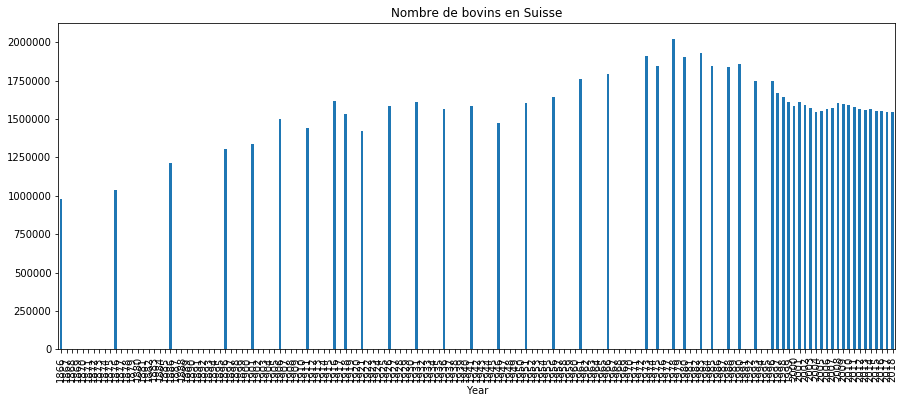

In [18]:
# graphique pour toute la suisse 
df_elevage_bovins2['CH'].plot.bar(figsize=(15, 6), lw=2, title='Nombre de bovins en Suisse')

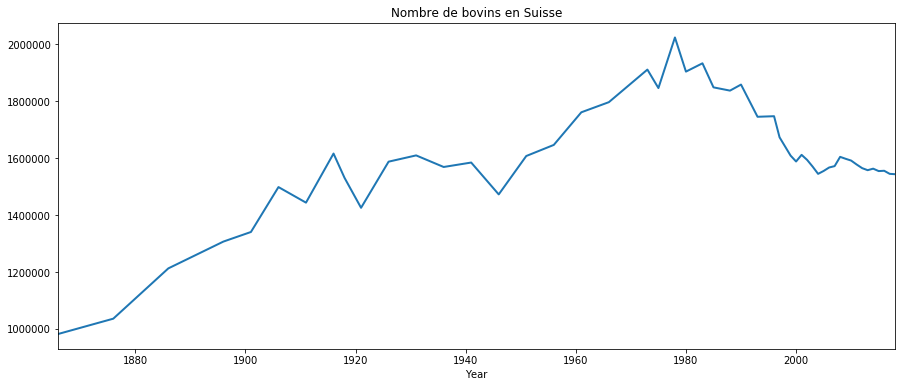

In [19]:
# graphique pour toute la suisse 
df_elevage_bovins3['CH'].plot(figsize=(15, 6), lw=2, title='Nombre de bovins en Suisse')

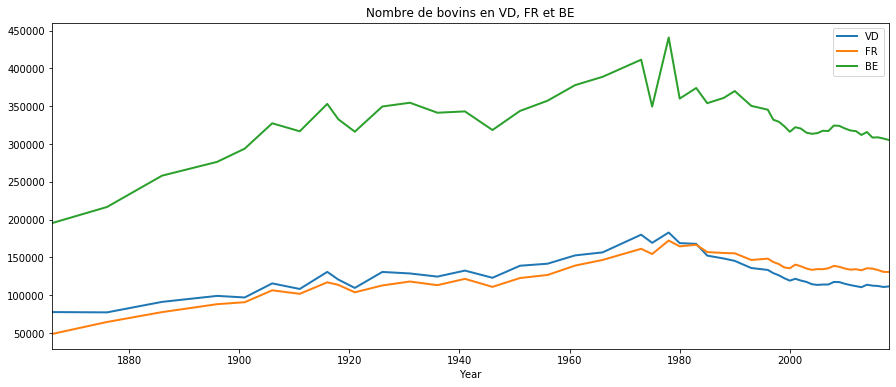

In [20]:
# graphique pour 3 cantons
df_elevage_bovins3[['VD', 'FR', 'BE']].plot(figsize=(15, 6), lw=2, title='Nombre de bovins en VD, FR et BE')

In [21]:
from ipywidgets import interact

@interact
def plot(n=(1, 20)):
    fig, ax = plt.subplots(1, 1, figsize=(15, 8))
    df_elevage_bovins3['CH'].rolling(window=n).mean().plot(ax=ax)
    ax.set_ylim(900000, 2000000)
    ax.legend(loc='upper right', fontsize='small')
    plt.show()

interactive(children=(IntSlider(value=10, description='n', max=20, min=1), Output()), _dom_classes=('widget-in…

## Données de population

In [22]:
df_population_ofs_2018 =  pd.read_excel(url_population_ofs, sheet_name='2018' , skiprows=3, nrows=28, usecols='A,H', names=('canton', '2018'))
df_population_ofs_2018.iloc[0,0] = 'Suisse'
df_population_ofs_2018

,canton,2018
0,Suisse,8544527.0
1,Zurich,1520968.0
2,Berne,1034977.0
3,Lucerne,409557.0
4,Uri,36433.0
5,Schwytz,159165.0
6,Obwald,37841.0
7,Nidwald,43223.0
8,Glaris,40403.0
9,Zoug,126837.0


In [23]:
# comparer avec la population
# fichier OFS : une année par onglet et 1 lignes en trop en haut
df_population_ofs = pd.DataFrame()
for annee in range (1991, 2019) :
    if annee > 2010 :
        df_population_ofs_temp =  pd.read_excel(url_population_ofs, sheet_name=str(annee) , skiprows=3, nrows=27, usecols='A,H', names=('canton', str(annee)))
    else :
        df_population_ofs_temp =  pd.read_excel(url_population_ofs, sheet_name=str(annee) , skiprows=4, nrows=27, usecols='A,H', names=('canton', str(annee)))
    # corriger la valeur pour la Suisse qui a des numéros de notes
    df_population_ofs_temp.iloc[0,0] = 'Suisse'
    # ajouter index et append colonnes
    df_population_ofs_temp = df_population_ofs_temp.set_index('canton')
    df_population_ofs = pd.concat([df_population_ofs, df_population_ofs_temp], axis=1)
    print (str(annee))
df_population_ofs


1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018


,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
canton,,,,,,,,,,,,,,,,,,,,,
Suisse,6842768,6907959,6968570,7019019,7062354,7081346,7096465,7123537,7164444,7204055,...,7785806,7864012,7954662,8039060,8139631,8237666,8327126,8419550,8484130,8544527
Zurich,1151718,1158077,1162083,1168567,1175457,1178848,1181614,1187609,1198569,1211647,...,1351297,1368822,1392396,1408575,1425538,1446354,1466424,1487969,1504346,1520968
Berne,949770,953458,956617,941747,941952,940928,938647,941144,943427,943696,...,974235,978248,985046,992617,1001281,1009418,1017483,1026513,1031126,1034977
Lucerne,326283,331830,335385,337941,340536,341809,342916,343254,345357,347209,...,372964,376395,381966,386082,390349,394604,398762,403397,406506,409557
Uri,35363,35544,35727,35933,35876,35861,35769,35612,35487,35246,...,35335,35301,35382,35693,35865,36008,35973,36145,36299,36433
Schwytz,113553,116090,118528,120576,122409,123788,125149,126479,128248,130232,...,144686,146285,147904,149830,151396,152759,154093,155863,157301,159165
Obwald,29712,30247,30837,30958,31310,31440,31831,31989,32225,32414,...,35032,35492,35885,36115,36507,36834,37076,37378,37575,37841
Nidwald,34344,34866,35393,35983,36466,36794,37232,37320,37657,38000,...,40794,40922,41311,41584,41888,42080,42420,42556,42969,43223
Glaris,38720,38976,39138,39388,39410,39161,38735,38698,38708,38546,...,38479,38568,39217,39369,39593,39794,40028,40147,40349,40403


In [24]:
# Renommer les cantons
df_population_ofs = df_population_ofs.rename(index={'Suisse' : 'CH', 'Zurich' : 'ZH', 'Berne' : 'BE',
                                                              'Lucerne' : 'LU', 'Uri' : 'UR', 'Schwytz' : 'SZ',
                                                              'Obwald' : 'OW', 'Nidwald' : 'NW', 'Glaris' : 'GL',
                                                              'Zoug' : 'ZG', 'Fribourg' : 'FR', 'Soleure' : 'SO',
                                                              'Bâle-Ville' : 'BS', 'Bâle-Campagne' : 'BL',
                                                              'Schaffhouse' : 'SH', 'Appenzell Rh.-Ext.' : 'AR',
                                                              'Appenzell Rh.-Int.' : 'AI', 'Saint-Gall' : 'SG',
                                                              'Grisons' : 'GR',
                                                              'Argovie' : 'AG', 'Thurgovie' : 'TG',
                                                              'Tessin' : 'TI', 'Vaud' : 'VD', 'Valais' : 'VS',
                                                              'Neuchâtel' : 'NE', 'Genève' : 'GE', 'Jura' : 'JU'})
df_population_ofs

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
canton,,,,,,,,,,,,,,,,,,,,,
CH,6842768,6907959,6968570,7019019,7062354,7081346,7096465,7123537,7164444,7204055,...,7785806,7864012,7954662,8039060,8139631,8237666,8327126,8419550,8484130,8544527
ZH,1151718,1158077,1162083,1168567,1175457,1178848,1181614,1187609,1198569,1211647,...,1351297,1368822,1392396,1408575,1425538,1446354,1466424,1487969,1504346,1520968
BE,949770,953458,956617,941747,941952,940928,938647,941144,943427,943696,...,974235,978248,985046,992617,1001281,1009418,1017483,1026513,1031126,1034977
LU,326283,331830,335385,337941,340536,341809,342916,343254,345357,347209,...,372964,376395,381966,386082,390349,394604,398762,403397,406506,409557
UR,35363,35544,35727,35933,35876,35861,35769,35612,35487,35246,...,35335,35301,35382,35693,35865,36008,35973,36145,36299,36433
SZ,113553,116090,118528,120576,122409,123788,125149,126479,128248,130232,...,144686,146285,147904,149830,151396,152759,154093,155863,157301,159165
OW,29712,30247,30837,30958,31310,31440,31831,31989,32225,32414,...,35032,35492,35885,36115,36507,36834,37076,37378,37575,37841
NW,34344,34866,35393,35983,36466,36794,37232,37320,37657,38000,...,40794,40922,41311,41584,41888,42080,42420,42556,42969,43223
GL,38720,38976,39138,39388,39410,39161,38735,38698,38708,38546,...,38479,38568,39217,39369,39593,39794,40028,40147,40349,40403


In [25]:
# transposer
df_population_ofs = df_population_ofs.transpose()
df_population_ofs

canton,CH,ZH,BE,LU,UR,SZ,OW,NW,GL,ZG,...,SG,GR,AG,TG,TI,VD,VS,NE,GE,JU
1991,6842768,1151718,949770,326283,35363,113553,29712,34344,38720,85882,...,427648,176188,506818,210542,290000,587283,257730,161774,381404,67528
1992,6907959,1158077,953458,331830,35544,116090,30247,34866,38976,87065,...,432819,179279,511979,213167,294108,593007,262389,162581,383911,68323
1993,6968570,1162083,956617,335385,35727,118528,30837,35393,39138,88583,...,436967,181957,518945,217129,297955,596736,266713,163884,387606,68626
1994,7019019,1168567,941747,337941,35933,120576,30958,35983,39388,90412,...,440744,184155,523114,220335,302131,602099,269341,164176,391699,68979
1995,7062354,1175457,941952,340536,35876,122409,31310,36466,39410,92392,...,442350,185063,528887,223372,305199,605677,271291,165258,395466,69188
1996,7081346,1178848,940928,341809,35861,123788,31440,36794,39161,93737,...,443839,185999,531665,224822,304830,606471,272315,165232,394588,68948
1997,7096465,1181614,938647,342916,35769,125149,31831,37232,38735,95098,...,443880,185532,534028,225395,305588,608153,273362,165410,396659,68964
1998,7123537,1187609,941144,343254,35612,126479,31989,37320,38698,96517,...,444891,186118,536462,226479,306179,611613,274458,165594,398910,68995
1999,7164444,1198569,943427,345357,35487,128248,32225,37657,38708,97758,...,447609,186026,540639,227285,308498,616275,275632,165649,403067,68818
2000,7204055,1211647,943696,347209,35246,130232,32414,38000,38546,99388,...,449399,186744,544306,227306,310215,620294,276170,165731,408820,68794


In [26]:
# modifier le type de l'année et renommer l'index
df_population_ofs = df_population_ofs.reset_index()
df_population_ofs['Year'] = df_population_ofs['index'].astype(int)
del df_population_ofs['index']
df_population_ofs = df_population_ofs.set_index('Year')
df_population_ofs

canton,CH,ZH,BE,LU,UR,SZ,OW,NW,GL,ZG,...,SG,GR,AG,TG,TI,VD,VS,NE,GE,JU
Year,,,,,,,,,,,,,,,,,,,,,
1991,6842768,1151718,949770,326283,35363,113553,29712,34344,38720,85882,...,427648,176188,506818,210542,290000,587283,257730,161774,381404,67528
1992,6907959,1158077,953458,331830,35544,116090,30247,34866,38976,87065,...,432819,179279,511979,213167,294108,593007,262389,162581,383911,68323
1993,6968570,1162083,956617,335385,35727,118528,30837,35393,39138,88583,...,436967,181957,518945,217129,297955,596736,266713,163884,387606,68626
1994,7019019,1168567,941747,337941,35933,120576,30958,35983,39388,90412,...,440744,184155,523114,220335,302131,602099,269341,164176,391699,68979
1995,7062354,1175457,941952,340536,35876,122409,31310,36466,39410,92392,...,442350,185063,528887,223372,305199,605677,271291,165258,395466,69188
1996,7081346,1178848,940928,341809,35861,123788,31440,36794,39161,93737,...,443839,185999,531665,224822,304830,606471,272315,165232,394588,68948
1997,7096465,1181614,938647,342916,35769,125149,31831,37232,38735,95098,...,443880,185532,534028,225395,305588,608153,273362,165410,396659,68964
1998,7123537,1187609,941144,343254,35612,126479,31989,37320,38698,96517,...,444891,186118,536462,226479,306179,611613,274458,165594,398910,68995
1999,7164444,1198569,943427,345357,35487,128248,32225,37657,38708,97758,...,447609,186026,540639,227285,308498,616275,275632,165649,403067,68818


In [27]:
# fichier HSSO pour la population : 6 lignes en trop en haut
df_population_hsso = pd.read_excel(url_population_hsso, skiprows=2, nrows=38)
df_population_hsso

,Jahr,ZH,"BE, JU",BE (1),LU,UR,SZ,OW,NW,GL,...,AG,TG,TI,VD,VS,NE,GE,JU,CH,Année
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1671,120800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,88000,NaN,NaN,NaN,NaN,NaN,NaN,1671
2,1690*,a)119400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a)1200000,*1690
3,1732/34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1732/34
4,1743,NaN,NaN,NaN,75200.000000,9800.000000,25815.0,9000.0,7800.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1743
5,1751/52,b)143400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12200,...,NaN,NaN,NaN,NaN,NaN,32335.0,NaN,NaN,NaN,1751/52
6,1760/62,172200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,32428.0,NaN,NaN,NaN,1760/62
7,1764/68,175000,c)292500,NaN,NaN,13500.000000,29172.0,NaN,NaN,NaN,...,NaN,NaN,NaN,112300,NaN,34000.0,NaN,NaN,NaN,1764/66
8,1771/74,152200,NaN,NaN,81000.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,35335.0,NaN,NaN,NaN,1771/74
9,1778/85,174600,NaN,NaN,77400.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,40118.0,NaN,NaN,NaN,1778/85


In [28]:
# garder seulement les lignes depuis 1850
df_population_hsso = df_population_hsso.iloc[22:37]
df_population_hsso

,Jahr,ZH,"BE, JU",BE (1),LU,UR,SZ,OW,NW,GL,...,AG,TG,TI,VD,VS,NE,GE,JU,CH,Année
22,1850,250698,458301,413468.0,132843.0,14505.0,44168.0,13799.0,11339.0,30213,...,199852.0,88908,117759,199575,81559.0,70753.0,64146.0,44833.0,2392740,1850
23,1860,266265,467141,419518.0,130504.0,14741.0,45039.0,13376.0,11526.0,33363,...,194208.0,90080,116343,213157,90792.0,87369.0,82876.0,47623.0,2510494,1860
24,1870,284047,501501,450537.0,132153.0,16095.0,47733.0,14443.0,11701.0,35208,...,198718.0,93202,121591,229588,96722.0,95425.0,88791.0,50964.0,2655001,1870
25,1880,316074,530411,478364.0,134708.0,23744.0,51109.0,15329.0,11979.0,34242,...,198357.0,99231,130394,235349,100190.0,102744.0,99712.0,52047.0,2831787,1880
26,1888,337183,536679,482976.0,135360.0,17249.0,50307.0,15043.0,12538.0,33825,...,193580.0,104678,126751,247655,101985.0,108153.0,105509.0,53703.0,2917754,1888
27,1900,431036,589433,531973.0,146519.0,19700.0,55385.0,15260.0,13070.0,32349,...,206498.0,113221,138638,281379,114438.0,126279.0,132609.0,57460.0,3315443,1900
28,1910,503915,645877,587100.0,167223.0,22113.0,58428.0,17161.0,13788.0,33316,...,230634.0,134917,156166,317457,128381.0,133061.0,154906.0,58777.0,3753293,1910
29,1920,538602,674394,615916.0,177073.0,23973.0,59731.0,17567.0,13956.0,33834,...,240776.0,135933,152256,317498,128246.0,131349.0,171000.0,58478.0,3880320,1920
30,1930,617706,688774,633161.0,189391.0,22968.0,62337.0,19401.0,15055.0,35653,...,259644.0,136063,159223,331853,136394.0,124324.0,171366.0,55613.0,4066400,1930
31,1941,674505,728916,672563.0,206608.0,27302.0,66555.0,20340.0,17348.0,34771,...,270463.0,138122,161882,343398,148319.0,117900.0,174855.0,56353.0,4265703,1941


In [29]:
# suppriner la dernière colonne et transformer l'année en int
del df_population_hsso['Année']
df_population_hsso['Year'] = df_population_hsso['Jahr'].astype(int)
del df_population_hsso['Jahr']
df_population_hsso = df_population_hsso.set_index('Year')
df_population_hsso

C:\Users\iriarte\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ZH,"BE, JU",BE (1),LU,UR,SZ,OW,NW,GL,ZG,...,GR,AG,TG,TI,VD,VS,NE,GE,JU,CH
Year,,,,,,,,,,,,,,,,,,,,,
1850,250698,458301,413468.0,132843.0,14505.0,44168.0,13799.0,11339.0,30213,17461.0,...,89895.0,199852.0,88908,117759,199575,81559.0,70753.0,64146.0,44833.0,2392740
1860,266265,467141,419518.0,130504.0,14741.0,45039.0,13376.0,11526.0,33363,19608.0,...,90713.0,194208.0,90080,116343,213157,90792.0,87369.0,82876.0,47623.0,2510494
1870,284047,501501,450537.0,132153.0,16095.0,47733.0,14443.0,11701.0,35208,20925.0,...,92103.0,198718.0,93202,121591,229588,96722.0,95425.0,88791.0,50964.0,2655001
1880,316074,530411,478364.0,134708.0,23744.0,51109.0,15329.0,11979.0,34242,22829.0,...,93864.0,198357.0,99231,130394,235349,100190.0,102744.0,99712.0,52047.0,2831787
1888,337183,536679,482976.0,135360.0,17249.0,50307.0,15043.0,12538.0,33825,23029.0,...,94810.0,193580.0,104678,126751,247655,101985.0,108153.0,105509.0,53703.0,2917754
1900,431036,589433,531973.0,146519.0,19700.0,55385.0,15260.0,13070.0,32349,25093.0,...,104520.0,206498.0,113221,138638,281379,114438.0,126279.0,132609.0,57460.0,3315443
1910,503915,645877,587100.0,167223.0,22113.0,58428.0,17161.0,13788.0,33316,28156.0,...,117069.0,230634.0,134917,156166,317457,128381.0,133061.0,154906.0,58777.0,3753293
1920,538602,674394,615916.0,177073.0,23973.0,59731.0,17567.0,13956.0,33834,31569.0,...,119854.0,240776.0,135933,152256,317498,128246.0,131349.0,171000.0,58478.0,3880320
1930,617706,688774,633161.0,189391.0,22968.0,62337.0,19401.0,15055.0,35653,34395.0,...,126340.0,259644.0,136063,159223,331853,136394.0,124324.0,171366.0,55613.0,4066400


In [30]:
# Supprimer la colonne pour BE,JU et renommer celle de BE(1)
del df_population_hsso['BE, JU']
df_population_hsso = df_population_hsso.rename(columns={'BE (1)' : 'BE'})
df_population_hsso

,ZH,BE,LU,UR,SZ,OW,NW,GL,ZG,FR,...,GR,AG,TG,TI,VD,VS,NE,GE,JU,CH
Year,,,,,,,,,,,,,,,,,,,,,
1850,250698,413468.0,132843.0,14505.0,44168.0,13799.0,11339.0,30213,17461.0,99891.0,...,89895.0,199852.0,88908,117759,199575,81559.0,70753.0,64146.0,44833.0,2392740
1860,266265,419518.0,130504.0,14741.0,45039.0,13376.0,11526.0,33363,19608.0,105523.0,...,90713.0,194208.0,90080,116343,213157,90792.0,87369.0,82876.0,47623.0,2510494
1870,284047,450537.0,132153.0,16095.0,47733.0,14443.0,11701.0,35208,20925.0,110409.0,...,92103.0,198718.0,93202,121591,229588,96722.0,95425.0,88791.0,50964.0,2655001
1880,316074,478364.0,134708.0,23744.0,51109.0,15329.0,11979.0,34242,22829.0,114994.0,...,93864.0,198357.0,99231,130394,235349,100190.0,102744.0,99712.0,52047.0,2831787
1888,337183,482976.0,135360.0,17249.0,50307.0,15043.0,12538.0,33825,23029.0,119155.0,...,94810.0,193580.0,104678,126751,247655,101985.0,108153.0,105509.0,53703.0,2917754
1900,431036,531973.0,146519.0,19700.0,55385.0,15260.0,13070.0,32349,25093.0,127951.0,...,104520.0,206498.0,113221,138638,281379,114438.0,126279.0,132609.0,57460.0,3315443
1910,503915,587100.0,167223.0,22113.0,58428.0,17161.0,13788.0,33316,28156.0,139654.0,...,117069.0,230634.0,134917,156166,317457,128381.0,133061.0,154906.0,58777.0,3753293
1920,538602,615916.0,177073.0,23973.0,59731.0,17567.0,13956.0,33834,31569.0,143055.0,...,119854.0,240776.0,135933,152256,317498,128246.0,131349.0,171000.0,58478.0,3880320
1930,617706,633161.0,189391.0,22968.0,62337.0,19401.0,15055.0,35653,34395.0,143230.0,...,126340.0,259644.0,136063,159223,331853,136394.0,124324.0,171366.0,55613.0,4066400


In [31]:
# fusion de deux fichiers
df_population = pd.concat([df_population_hsso, df_population_ofs]).sort_index()
df_population

C:\Users\iriarte\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,AG,AI,AR,BE,BL,BS,CH,FR,GE,GL,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
Year,,,,,,,,,,,,,,,,,,,,,
1850,199852.0,11272.0,43621,413468.0,47885.0,29698.0,2392740,99891.0,64146.0,30213,...,35300.0,69674.0,44168.0,88908,117759,14505.0,199575,81559.0,17461.0,250698
1860,194208.0,12000.0,48431,419518.0,51582.0,40683.0,2510494,105523.0,82876.0,33363,...,35500.0,69263.0,45039.0,90080,116343,14741.0,213157,90792.0,19608.0,266265
1870,198718.0,11922.0,48734,450537.0,54026.0,47040.0,2655001,110409.0,88791.0,35208,...,37642.0,74608.0,47733.0,93202,121591,16095.0,229588,96722.0,20925.0,284047
1880,198357.0,12874.0,51953,478364.0,59171.0,64207.0,2831787,114994.0,99712.0,34242,...,38241.0,80362.0,51109.0,99231,130394,23744.0,235349,100190.0,22829.0,316074
1888,193580.0,12888.0,54109,482976.0,61941.0,73749.0,2917754,119155.0,105509.0,33825,...,37783.0,85621.0,50307.0,104678,126751,17249.0,247655,101985.0,23029.0,337183
1900,206498.0,13499.0,55281,531973.0,68497.0,112227.0,3315443,127951.0,132609.0,32349,...,41514.0,100762.0,55385.0,113221,138638,19700.0,281379,114438.0,25093.0,431036
1910,230634.0,14659.0,57973,587100.0,76488.0,135918.0,3753293,139654.0,154906.0,33316,...,46097.0,117040.0,58428.0,134917,156166,22113.0,317457,128381.0,28156.0,503915
1920,240776.0,14614.0,55354,615916.0,82390.0,140708.0,3880320,143055.0,171000.0,33834,...,50428.0,130617.0,59731.0,135933,152256,23973.0,317498,128246.0,31569.0,538602
1930,259644.0,13988.0,48977,633161.0,92541.0,155030.0,4066400,143230.0,171366.0,35653,...,51187.0,144198.0,62337.0,136063,159223,22968.0,331853,136394.0,34395.0,617706


In [32]:
df_population.dtypes

AG    float64
AI    float64
AR     object
BE    float64
BL    float64
BS    float64
CH     object
FR    float64
GE    float64
GL     object
GR    float64
JU    float64
LU    float64
NE    float64
NW    float64
OW    float64
SG    float64
SH    float64
SO    float64
SZ    float64
TG     object
TI     object
UR    float64
VD     object
VS    float64
ZG    float64
ZH     object
dtype: object

In [33]:
# certaines colonnes ne sont pas numériques : conversion à numérique partout
df_population = df_population.apply(pd.to_numeric, errors='coerce')
df_population

,AG,AI,AR,BE,BL,BS,CH,FR,GE,GL,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
Year,,,,,,,,,,,,,,,,,,,,,
1850,199852.0,11272.0,43621,413468.0,47885.0,29698.0,2392740,99891.0,64146.0,30213,...,35300.0,69674.0,44168.0,88908,117759,14505.0,199575,81559.0,17461.0,250698
1860,194208.0,12000.0,48431,419518.0,51582.0,40683.0,2510494,105523.0,82876.0,33363,...,35500.0,69263.0,45039.0,90080,116343,14741.0,213157,90792.0,19608.0,266265
1870,198718.0,11922.0,48734,450537.0,54026.0,47040.0,2655001,110409.0,88791.0,35208,...,37642.0,74608.0,47733.0,93202,121591,16095.0,229588,96722.0,20925.0,284047
1880,198357.0,12874.0,51953,478364.0,59171.0,64207.0,2831787,114994.0,99712.0,34242,...,38241.0,80362.0,51109.0,99231,130394,23744.0,235349,100190.0,22829.0,316074
1888,193580.0,12888.0,54109,482976.0,61941.0,73749.0,2917754,119155.0,105509.0,33825,...,37783.0,85621.0,50307.0,104678,126751,17249.0,247655,101985.0,23029.0,337183
1900,206498.0,13499.0,55281,531973.0,68497.0,112227.0,3315443,127951.0,132609.0,32349,...,41514.0,100762.0,55385.0,113221,138638,19700.0,281379,114438.0,25093.0,431036
1910,230634.0,14659.0,57973,587100.0,76488.0,135918.0,3753293,139654.0,154906.0,33316,...,46097.0,117040.0,58428.0,134917,156166,22113.0,317457,128381.0,28156.0,503915
1920,240776.0,14614.0,55354,615916.0,82390.0,140708.0,3880320,143055.0,171000.0,33834,...,50428.0,130617.0,59731.0,135933,152256,23973.0,317498,128246.0,31569.0,538602
1930,259644.0,13988.0,48977,633161.0,92541.0,155030.0,4066400,143230.0,171366.0,35653,...,51187.0,144198.0,62337.0,136063,159223,22968.0,331853,136394.0,34395.0,617706


In [34]:
df_population.dtypes

AG    float64
AI    float64
AR      int64
BE    float64
BL    float64
BS    float64
CH      int64
FR    float64
GE    float64
GL      int64
GR    float64
JU    float64
LU    float64
NE    float64
NW    float64
OW    float64
SG    float64
SH    float64
SO    float64
SZ    float64
TG      int64
TI      int64
UR    float64
VD      int64
VS    float64
ZG    float64
ZH      int64
dtype: object

In [35]:
# ajouter les années manquantes
df_population2 = df_population.reindex(range(1850, 2019))
df_population2

,AG,AI,AR,BE,BL,BS,CH,FR,GE,GL,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
Year,,,,,,,,,,,,,,,,,,,,,
1850,199852.0,11272.0,43621.0,413468.0,47885.0,29698.0,2392740.0,99891.0,64146.0,30213.0,...,35300.0,69674.0,44168.0,88908.0,117759.0,14505.0,199575.0,81559.0,17461.0,250698.0
1851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# ajouter une interpolation linaire pour remplir les vides
df_population3 = df_population2.interpolate(method='linear', axis=0)
df_population3

,AG,AI,AR,BE,BL,BS,CH,FR,GE,GL,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
Year,,,,,,,,,,,,,,,,,,,,,
1850,199852.0,11272.0,43621.0,413468.0,47885.0,29698.0,2392740.0,99891.0,64146.0,30213.0,...,35300.0,69674.0,44168.0,88908.0,117759.0,14505.0,199575.0,81559.0,17461.0,250698.0
1851,199287.6,11344.8,44102.0,414073.0,48254.7,30796.5,2404515.4,100454.2,66019.0,30528.0,...,35320.0,69632.9,44255.1,89025.2,117617.4,14528.6,200933.2,82482.3,17675.7,252254.7
1852,198723.2,11417.6,44583.0,414678.0,48624.4,31895.0,2416290.8,101017.4,67892.0,30843.0,...,35340.0,69591.8,44342.2,89142.4,117475.8,14552.2,202291.4,83405.6,17890.4,253811.4
1853,198158.8,11490.4,45064.0,415283.0,48994.1,32993.5,2428066.2,101580.6,69765.0,31158.0,...,35360.0,69550.7,44429.3,89259.6,117334.2,14575.8,203649.6,84328.9,18105.1,255368.1
1854,197594.4,11563.2,45545.0,415888.0,49363.8,34092.0,2439841.6,102143.8,71638.0,31473.0,...,35380.0,69509.6,44516.4,89376.8,117192.6,14599.4,205007.8,85252.2,18319.8,256924.8
1855,197030.0,11636.0,46026.0,416493.0,49733.5,35190.5,2451617.0,102707.0,73511.0,31788.0,...,35400.0,69468.5,44603.5,89494.0,117051.0,14623.0,206366.0,86175.5,18534.5,258481.5
1856,196465.6,11708.8,46507.0,417098.0,50103.2,36289.0,2463392.4,103270.2,75384.0,32103.0,...,35420.0,69427.4,44690.6,89611.2,116909.4,14646.6,207724.2,87098.8,18749.2,260038.2
1857,195901.2,11781.6,46988.0,417703.0,50472.9,37387.5,2475167.8,103833.4,77257.0,32418.0,...,35440.0,69386.3,44777.7,89728.4,116767.8,14670.2,209082.4,88022.1,18963.9,261594.9
1858,195336.8,11854.4,47469.0,418308.0,50842.6,38486.0,2486943.2,104396.6,79130.0,32733.0,...,35460.0,69345.2,44864.8,89845.6,116626.2,14693.8,210440.6,88945.4,19178.6,263151.6


In [37]:
# export en CSV du fichier original
df_population2.to_csv('export_population_suisse_1850_2018.tsv', sep='\t')

In [38]:
# export en CSV
df_population3.to_csv('export_population_suisse_1850_2018_extrapolation.tsv', sep='\t')

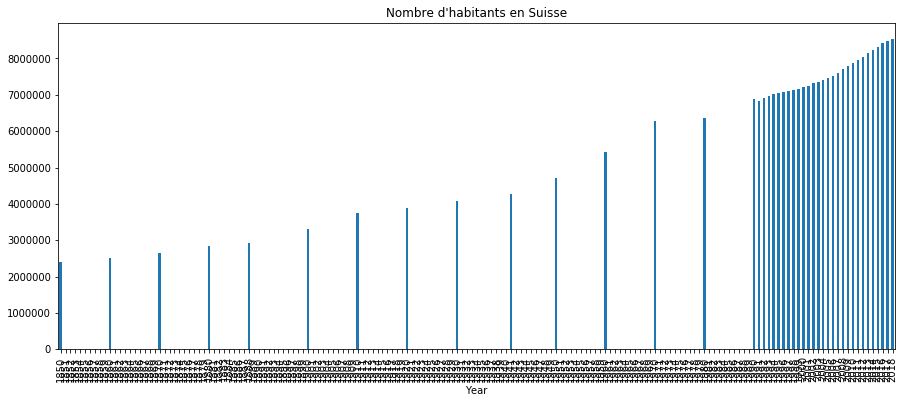

In [39]:
# graphique pour toute la suisse 
df_population2['CH'].plot.bar(figsize=(15, 6), lw=2, title='Nombre d\'habitants en Suisse')

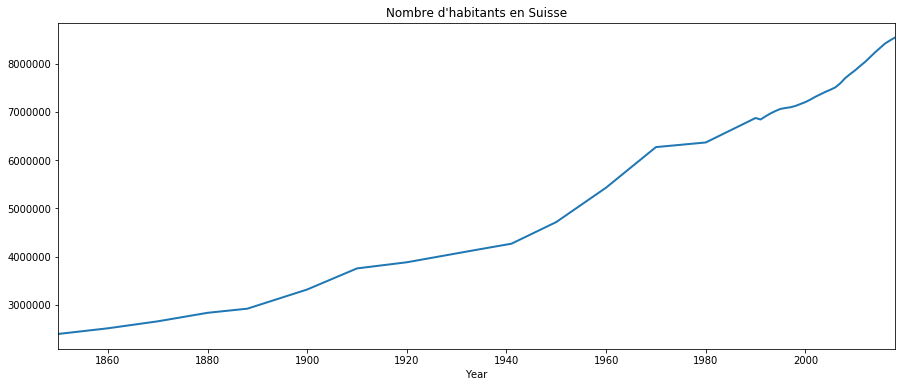

In [40]:
# graphique pour toute la suisse 
df_population3['CH'].plot(figsize=(15, 6), lw=2, title='Nombre d\'habitants en Suisse')

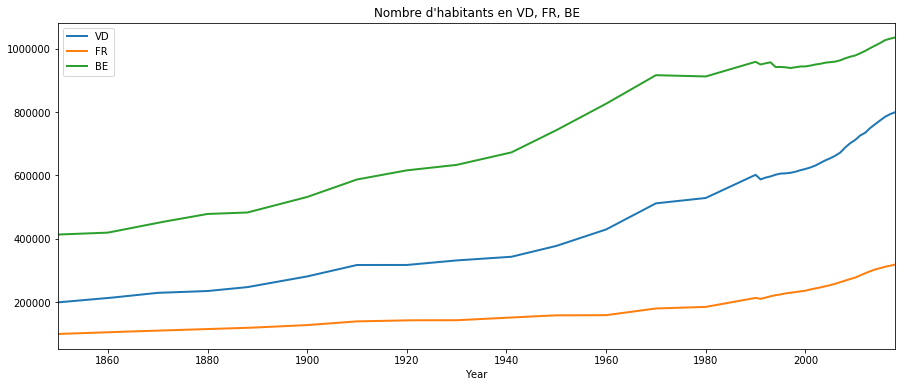

In [41]:
# graphique pour 3 cantons
df_population3[['VD', 'FR', 'BE']].plot(figsize=(15, 6), lw=2, title='Nombre d\'habitants en VD, FR, BE')

In [42]:
from ipywidgets import interact

@interact
def plot(n=(1, 20)):
    fig, ax = plt.subplots(1, 1, figsize=(15, 8))
    df_population3['CH'].rolling(window=n).mean().plot(ax=ax)
    ax.set_ylim(2000000, 9000000)
    ax.legend(loc='upper right', fontsize='small')
    plt.show()

interactive(children=(IntSlider(value=10, description='n', max=20, min=1), Output()), _dom_classes=('widget-in…

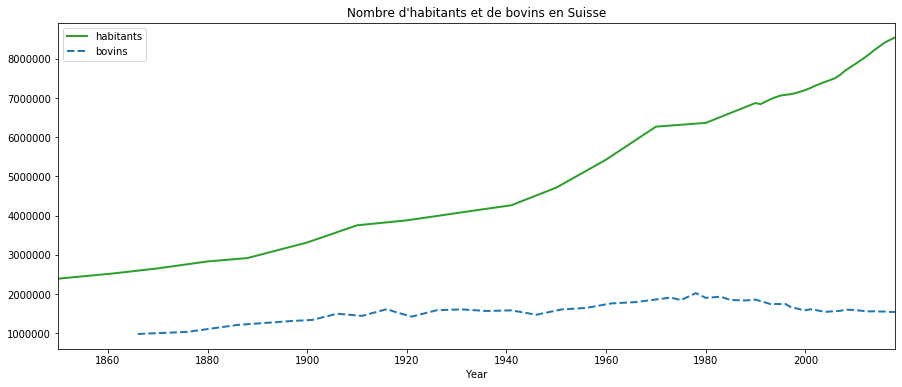

In [103]:
# graphique de population et des bovins pour toute la suisse 
ax = df_population3['CH'].plot(figsize=(15, 6), lw=2, color='#2ca02c', title='Nombre d\'habitants et de bovins en Suisse')
ax2 = df_elevage_bovins3['CH'].plot(figsize=(15, 6), style='--', lw=2, color='#1f77b4')
ax2.legend(['habitants','bovins'])

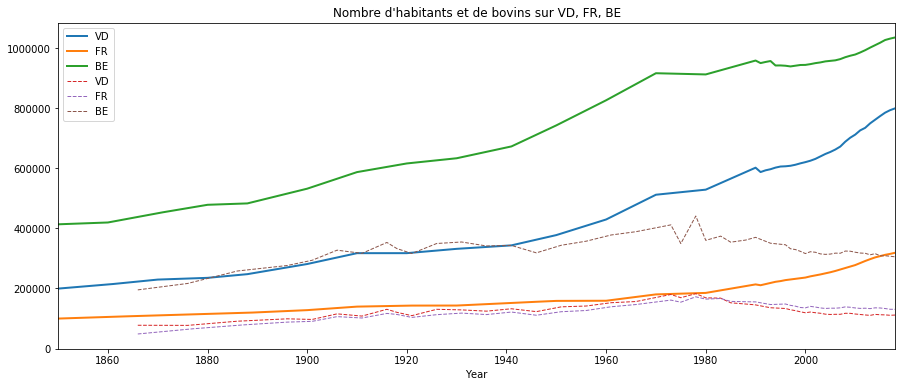

In [44]:
# graphique de population et des bovins pour quelques cantons 
ax = df_population3[['VD', 'FR', 'BE']].plot(figsize=(15, 6), lw=2, title='Nombre d\'habitants et de bovins sur VD, FR, BE')
df_elevage_bovins3[['VD', 'FR', 'BE']].plot(ax=ax, style='--', lw=1)

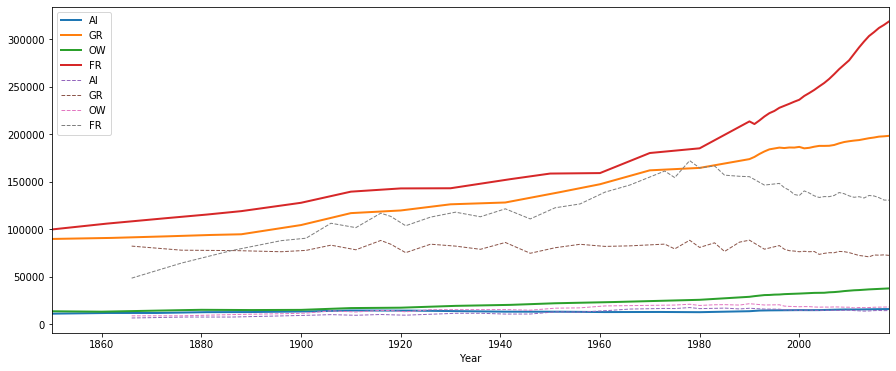

In [45]:
# graphique de population et des bovins pour quelques cantons
ax = df_population3[['AI', 'GR', 'OW', 'FR']].plot(figsize=(15, 6), lw=2)
df_elevage_bovins3[['AI', 'GR', 'OW', 'FR']].plot(ax=ax, style='--', lw=1)

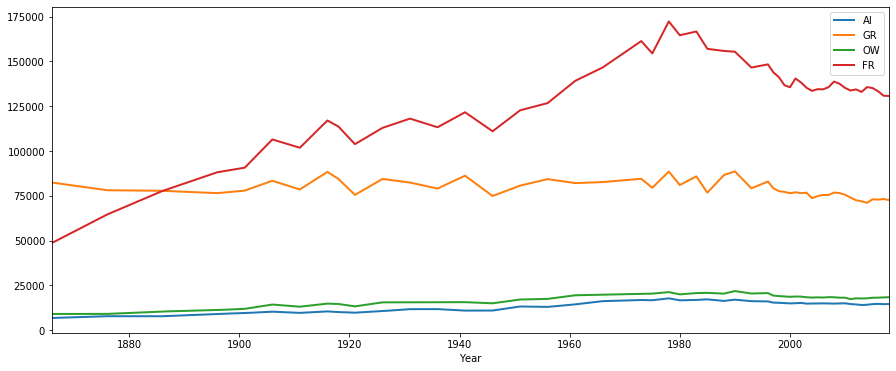

In [46]:
# graphique de population et des bovins pour quelques cantons
df_elevage_bovins3[['AI', 'GR', 'OW', 'FR']].plot(figsize=(15, 6), lw=2)

## Ratio bovins par habitant

In [47]:
# ration de bovins par habitant
df = df_elevage_bovins3 / df_population3
df

,AG,AI,AR,BE,BL,BS,CH,FR,GE,GL,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
Year,,,,,,,,,,,,,,,,,,,,,
1850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# export en CSV du fichier final
df.to_csv('export_ratio_bovins_par_habitant_suisse_1850_2018.tsv', sep='\t')

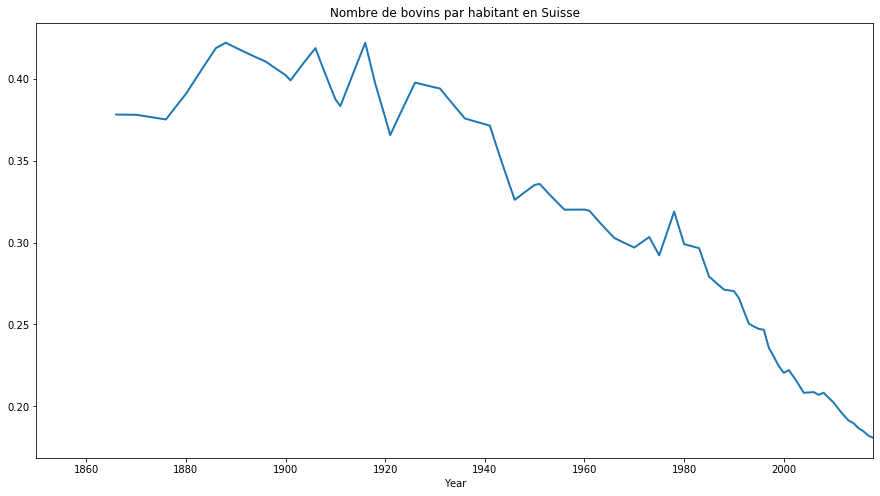

In [100]:
# graphique de population et des bovins pour toute la suisse 
fig = plt.figure()
ax = df['CH'].plot(figsize=(15, 8), lw=2, title='Nombre de bovins par habitant en Suisse')
# ax.legend(loc='upper right', bbox_to_anchor=(1.08, 1), ncol=1)
plt.show()

<Figure size 432x288 with 0 Axes>

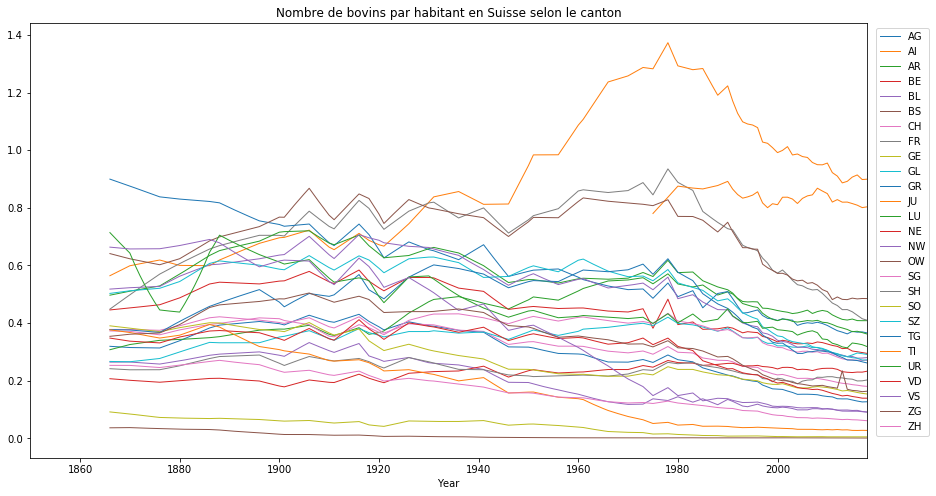

In [50]:
# graphique de population et des bovins pour toute la suisse 
fig = plt.figure()
ax = df.plot(figsize=(15, 8), lw=1, title='Nombre de bovins par habitant en Suisse selon le canton')
ax.legend(loc='upper right', bbox_to_anchor=(1.08, 1), ncol=1)
plt.show()

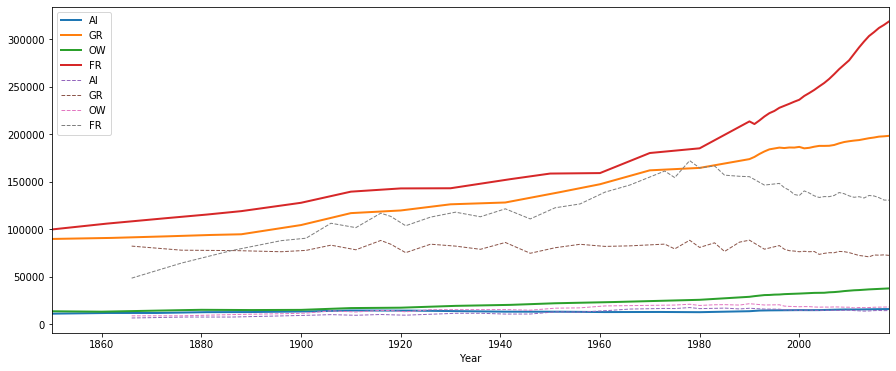

In [51]:
# graphique de population et des bovins pour quelques cantons
ax = df_population3[['AI', 'GR', 'OW', 'FR']].plot(figsize=(15, 6), lw=2)
df_elevage_bovins3[['AI', 'GR', 'OW', 'FR']].plot(ax=ax, style='--', lw=1)

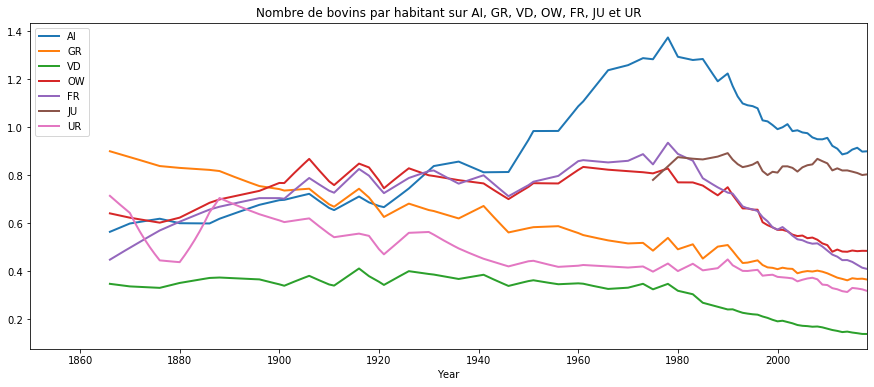

In [105]:
# graphique de population et des bovins pour quelques cantons
df[['AI', 'GR', 'VD', 'OW', 'FR', 'JU', 'UR']].plot(figsize=(15, 6), lw=2, title='Nombre de bovins par habitant sur AI, GR, VD, OW, FR, JU et UR')

In [53]:
# données pour l'année du livre
df.loc[2012]

AG    0.137812
AI    0.910225
AR    0.420225
BE    0.319406
BL    0.098414
BS    0.001771
CH    0.194629
FR    0.461099
GE    0.005532
GL    0.294216
GR    0.373855
JU    0.828536
LU    0.387972
NE    0.239771
NW    0.289847
OW    0.490793
SG    0.282429
SH    0.210852
SO    0.169919
SZ    0.292925
TG    0.287507
TI    0.030955
UR    0.325526
VD    0.152395
VS    0.097883
ZG    0.174368
ZH    0.066794
Name: 2012, dtype: float64

In [54]:
# tableau avec les valeurs de 2012 et 2018
df_2018 = df.loc[[1866,1918,1978,2018]].transpose()
df_2018 = df_2018.apply(pd.to_numeric, errors='coerce')
df_2018

Year,1866,1918,1978,2018
AG,0.319622,0.406165,0.289591,0.127309
AI,0.564535,0.687000,1.372868,0.899474
AR,0.307800,0.361163,0.571143,0.408643
BE,0.445820,0.545444,0.483108,0.294983
BL,0.264721,0.286284,0.131528,0.091777
BS,0.036946,0.010283,0.002180,0.001453
CH,0.378151,0.397031,0.318854,0.180624
FR,0.448658,0.798133,0.935050,0.410045
GE,0.092034,0.047043,0.016206,0.005516
GL,0.267131,0.366998,0.420695,0.291290


In [55]:
df_2018.dtypes

Year
1866    float64
1918    float64
1978    float64
2018    float64
dtype: object

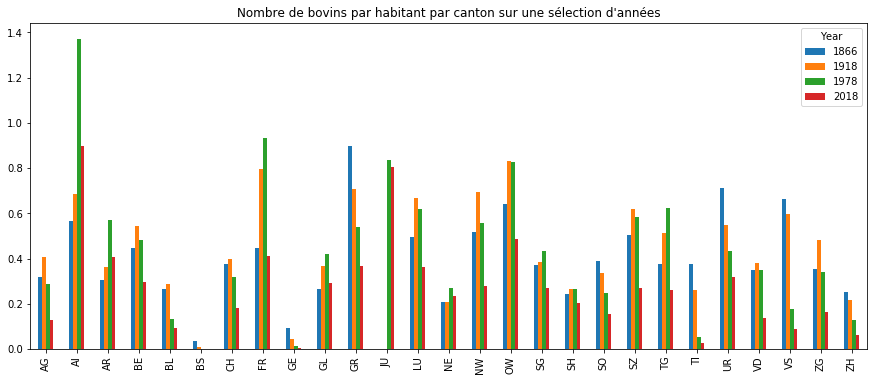

In [56]:
df_2018.plot(figsize=(15, 6), lw=2, kind='bar', title='Nombre de bovins par habitant par canton sur une sélection d\'années')

In [57]:
# cantons avec plus haute moyenne par année
df['canton_max'] = df.idxmax(axis=1)
df['max'] = df.max(axis=1)
df[['canton_max', 'max']]

,canton_max,max
Year,,
1850,NaN,NaN
1851,NaN,NaN
1852,NaN,NaN
1853,NaN,NaN
1854,NaN,NaN
1855,NaN,NaN
1856,NaN,NaN
1857,NaN,NaN
1858,NaN,NaN


In [58]:
# cantons avec valeurs maximales
df['canton_max'].value_counts()

AI    89
GR    32
OW    31
FR     1
Name: canton_max, dtype: int64

In [59]:
# export en CSV du fichier final
df[['canton_max', 'max']].to_csv('export_ratio_bovins_par_habitant_suisse_1850_2018_canton_max.tsv', sep='\t')

## Statsitiques sur la densité des bovins par canton


In [60]:
# ouverture fichier OFS
df_surface_ofs =  pd.read_excel(url_surface_cantons_ofs,skiprows=3, nrows=35)
df_surface_ofs

,Unnamed: 0,Années,Suisse,ZH,BE,LU,UR,SZ,OW,NW,...,SG,GR,AG,TG,TI,VD,VS,NE,GE,JU
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Habitants en milliers,2017,8484.130000,1504.346000,1031.126000,406.506000,36.299,157.301000,37.575,42.969,...,504.686000,197.888000,670.988000,273.801000,353.709000,793.129000,341.463000,177.964000,495.249000,73.29
4,Variation en %,2010-2017,7.801595,9.560925,5.238201,7.652340,2.47586,7.204389,5.59224,4.74113,...,5.382882,2.734385,9.734311,10.206324,5.979272,11.194466,9.203861,3.416335,8.200299,4.65216
5,par km²,2017,212.142443,905.774187,176.544231,284.442983,34.3305,184.775229,78.1803,178.043,...,258.667418,27.850407,480.970847,317.226078,129.042367,281.142750,65.491025,248.303382,2014.681474,87.405
6,Répartition par âge en %,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0–19,NaN,20.043234,19.733093,19.053346,20.385431,20.2733,19.545330,20.2848,18.3109,...,20.636792,18.141575,20.260422,20.352373,18.311380,21.994657,19.863060,21.318357,21.121496,21.213
8,20–64,NaN,61.683060,63.291357,60.387188,62.212120,59.66,63.007228,61.4212,61.9516,...,61.386684,60.962767,62.388448,62.392394,59.382430,61.642558,60.808638,59.881212,62.465346,58.203
9,65 ou plus,NaN,18.273706,16.975550,20.559466,17.402449,20.0667,17.447442,18.2941,19.7375,...,17.976524,20.895658,17.351130,17.255233,22.306190,16.362786,19.328302,18.800432,16.413158,20.584


In [61]:
# garder que la ligne de la surface
df_surface_ofs = df_surface_ofs.loc[df_surface_ofs['Unnamed: 0'] == 'Surface en km² 4)']
df_surface_ofs

,Unnamed: 0,Années,Suisse,ZH,BE,LU,UR,SZ,OW,NW,...,SG,GR,AG,TG,TI,VD,VS,NE,GE,JU
32,Surface en km² 4),2004/09,41290.39,1728.85,5959.4,1493.28,1076.3,908.03,490.64,275.94,...,2030.73,7105.0,1403.95,991.51,2812.25,3212.21,5224.77,802.26,282.32,838.61


In [62]:
# supprimer les deux premières colonnes et renommer celle de la Suisse
del df_surface_ofs['Années']
del df_surface_ofs['Unnamed: 0']
df_surface_ofs = df_surface_ofs.rename(columns=({'Suisse' : 'CH'}))
df_surface_ofs

,CH,ZH,BE,LU,UR,SZ,OW,NW,GL,ZG,...,SG,GR,AG,TG,TI,VD,VS,NE,GE,JU
32,41290.39,1728.85,5959.4,1493.28,1076.3,908.03,490.64,275.94,685.43,238.71,...,2030.73,7105.0,1403.95,991.51,2812.25,3212.21,5224.77,802.26,282.32,838.61


In [63]:
# densité des bovins au moment de la publication du livre
df_elevage_bovins3.loc[2012] / df_surface_ofs

,AG,AI,AR,BE,BL,BS,CH,FR,GE,GL,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
32,61.579828,82.9863,92.442,53.201329,52.564994,8.977826,37.893345,80.390338,9.074809,16.8989,...,55.0782,55.742247,48.334306,74.293754,3.76069,10.7953,34.839565,6.027442,85.153534,54.41999


In [64]:
# densité de la population au moment de la publication du livre
df_population3.loc[2012] / df_surface_ofs

,AG,AI,AR,BE,BL,BS,CH,FR,GE,GL,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
32,446.839275,91.1712,219.982,166.563245,534.123305,5068.280151,194.695666,174.344998,1640.340748,57.4369,...,261.217,328.052684,165.005561,258.406874,121.487066,33.1627,228.613945,61.578213,488.35407,814.746797


In [65]:
# densité des bovins en 2018
df_elevage_bovins3.loc[2018] / df_surface_ofs

,AG,AI,AR,BE,BL,BS,CH,FR,GE,GL,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
32,61.499341,84.2392,92.9154,51.230157,51.07583,7.652785,37.377826,78.191543,9.75843,17.1702,...,55.7551,53.28517,47.773752,72.992708,3.500756,10.7851,34.739011,6.008111,87.109882,54.119212


In [66]:
# densité de la population en 2018
df_population3.loc[2018] / df_surface_ofs

,AG,AI,AR,BE,BL,BS,CH,FR,GE,GL,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
32,483.070622,93.6539,227.375,173.671343,556.518716,5266.792861,206.937425,190.690272,1769.198073,58.9455,...,274.741,345.653302,175.286059,278.839346,125.644235,33.8502,248.783548,65.831606,531.343471,879.757064


In [67]:
# calcul de la densité de bovins par KM2 pour chaque année
densite_bovins = pd.DataFrame()
for annee in range (1866, 2019) :
    densite_bovins_temp = df_elevage_bovins2.loc[annee] / df_surface_ofs
    densite_bovins_temp['year'] = annee
    densite_bovins = pd.concat([densite_bovins, densite_bovins_temp])
    print(annee)

1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018


In [68]:
# modifier l'index
densite_bovins = densite_bovins.set_index('year')
densite_bovins

,AG,AI,AR,BE,BL,BS,CH,FR,GE,GL,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
year,,,,,,,,,,,,,,,,,,,,,
1866,44.829232,39.1438,61.5964,32.776286,27.123653,44.456463,23.785995,29.113242,28.173704,13.4339,...,29.8261,35.824993,25.850467,35.016288,16.008534,10.3196,24.172143,11.984642,30.271040,40.604448
1867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
densite_bovins.dtypes

AG    float64
AI     object
AR     object
BE    float64
BL    float64
BS    float64
CH    float64
FR    float64
GE    float64
GL     object
GR    float64
JU     object
LU    float64
NE    float64
NW     object
OW     object
SG    float64
SH     object
SO    float64
SZ    float64
TG    float64
TI    float64
UR     object
VD    float64
VS    float64
ZG    float64
ZH    float64
dtype: object

In [70]:
# certaines colonnes ne sont pas numériques : conversion à numérique partout
densite_bovins2 = densite_bovins.apply(pd.to_numeric, errors='coerce')
densite_bovins2.dtypes

AG    float64
AI    float64
AR    float64
BE    float64
BL    float64
BS    float64
CH    float64
FR    float64
GE    float64
GL    float64
GR    float64
JU    float64
LU    float64
NE    float64
NW    float64
OW    float64
SG    float64
SH    float64
SO    float64
SZ    float64
TG    float64
TI    float64
UR    float64
VD    float64
VS    float64
ZG    float64
ZH    float64
dtype: object

In [71]:
# ajouter une interpolation linaire pour remplir les vides
densite_bovins3 = densite_bovins2.interpolate(method='linear', axis=0)
densite_bovins3

,AG,AI,AR,BE,BL,BS,CH,FR,GE,GL,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
year,,,,,,,,,,,,,,,,,,,,,
1866,44.829232,39.143802,61.596410,32.776286,27.123653,44.456463,23.785995,29.113242,28.173704,13.433903,...,29.826090,35.824993,25.850467,35.016288,16.008534,10.319613,24.172143,11.984642,30.271040,40.604448
1867,44.783432,39.715181,62.535403,33.134963,27.258083,45.313683,23.916105,30.061925,27.817725,13.491969,...,29.879369,35.901287,26.120172,35.105445,15.978949,10.144291,24.159597,12.030711,30.626283,40.860572
1868,44.737633,40.286560,63.474395,33.493640,27.392514,46.170903,24.046215,31.010608,27.461746,13.550034,...,29.932648,35.977580,26.389877,35.194602,15.949364,9.968968,24.147051,12.076780,30.981526,41.116696
1869,44.691834,40.857938,64.413387,33.852317,27.526944,47.028123,24.176325,31.959291,27.105767,13.608100,...,29.985926,36.053874,26.659582,35.283759,15.919780,9.793645,24.134506,12.122849,31.336768,41.372820
1870,44.646034,41.429317,65.352379,34.210994,27.661374,47.885343,24.306435,32.907974,26.749787,13.666166,...,30.039205,36.130167,26.929286,35.372916,15.890195,9.618322,24.121960,12.168918,31.692011,41.628944
1871,44.600235,42.000696,66.291372,34.569671,27.795805,48.742564,24.436546,33.856657,26.393808,13.724232,...,30.092484,36.206460,27.198991,35.462073,15.860610,9.442999,24.109414,12.214987,32.047254,41.885068
1872,44.554436,42.572075,67.230364,34.928348,27.930235,49.599784,24.566656,34.805339,26.037829,13.782297,...,30.145763,36.282754,27.468696,35.551230,15.831025,9.267676,24.096868,12.261056,32.402497,42.141192
1873,44.508636,43.143454,68.169356,35.287026,28.064666,50.457004,24.696766,35.754022,25.681850,13.840363,...,30.199042,36.359047,27.738401,35.640387,15.801440,9.092353,24.084322,12.307125,32.757740,42.397316
1874,44.462837,43.714833,69.108348,35.645703,28.199096,51.314224,24.826876,36.702705,25.325871,13.898429,...,30.252320,36.435340,28.008105,35.729544,15.771855,8.917031,24.071776,12.353194,33.112982,42.653440


In [72]:
# calcul de la densité de la population par KM2 pour chaque année
densite_population = pd.DataFrame()
for annee in range (1850, 2019) :
    densite_population_temp = df_population2.loc[annee] / df_surface_ofs
    densite_population_temp['year'] = annee
    densite_population = pd.concat([densite_population, densite_population_temp])
    print(annee)

1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018


In [73]:
# modifier l'index
densite_population = densite_population.set_index('year')
densite_population

,AG,AI,AR,BE,BL,BS,CH,FR,GE,GL,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
year,,,,,,,,,,,,,,,,,,,,,
1850,142.349799,65.3866,179.569,69.380810,92.488508,803.082747,57.949077,59.765941,227.210258,44.0789,...,118.286,88.153650,48.641565,89.669292,41.873589,13.4767,62.130122,15.610065,73.147334,145.008532
1851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
densite_population.dtypes

AG    float64
AI     object
AR     object
BE    float64
BL    float64
BS    float64
CH    float64
FR    float64
GE    float64
GL     object
GR    float64
JU     object
LU    float64
NE    float64
NW     object
OW     object
SG    float64
SH     object
SO    float64
SZ    float64
TG    float64
TI    float64
UR     object
VD    float64
VS    float64
ZG    float64
ZH    float64
dtype: object

In [75]:
# certaines colonnes ne sont pas numériques : conversion à numérique partout
densite_population2 = densite_population.apply(pd.to_numeric, errors='coerce')
densite_population2.dtypes

AG    float64
AI    float64
AR    float64
BE    float64
BL    float64
BS    float64
CH    float64
FR    float64
GE    float64
GL    float64
GR    float64
JU    float64
LU    float64
NE    float64
NW    float64
OW    float64
SG    float64
SH    float64
SO    float64
SZ    float64
TG    float64
TI    float64
UR    float64
VD    float64
VS    float64
ZG    float64
ZH    float64
dtype: object

In [76]:
# ajouter une interpolation linaire pour remplir les vides
densite_population3 = densite_population2.interpolate(method='linear', axis=0)
densite_population3

,AG,AI,AR,BE,BL,BS,CH,FR,GE,GL,...,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH
year,,,,,,,,,,,,,,,,,,,,,
1850,142.349799,65.386623,179.569406,69.380810,92.488508,803.082747,57.949077,59.765941,227.210258,44.078899,...,118.285695,88.153650,48.641565,89.669292,41.873589,13.476726,62.130122,15.610065,73.147334,145.008532
1851,141.947790,65.808922,181.549481,69.482330,93.202573,832.787994,58.234262,60.102910,233.844574,44.538465,...,118.352713,88.101649,48.737487,89.787496,41.823238,13.498653,62.552946,15.786781,74.046751,145.908957
1852,141.545782,66.231220,183.529557,69.583851,93.916638,862.493240,58.519447,60.439879,240.478889,44.998030,...,118.419730,88.049648,48.833409,89.905699,41.772886,13.520580,62.975771,15.963497,74.946169,146.809382
1853,141.143773,66.653518,185.509633,69.685371,94.630703,892.198486,58.804632,60.776848,247.113205,45.457596,...,118.486747,87.997647,48.929331,90.023903,41.722535,13.542507,63.398595,16.140213,75.845587,147.709807
1854,140.741764,67.075816,187.489709,69.786891,95.344768,921.903732,59.089817,61.113817,253.747521,45.917161,...,118.553765,87.945646,49.025252,90.142106,41.672184,13.564434,63.821419,16.316929,76.745004,148.610232
1855,140.339756,67.498115,189.469784,69.888412,96.058833,951.608978,59.375002,61.450786,260.381836,46.376727,...,118.620782,87.893645,49.121174,90.260310,41.621833,13.586361,64.244243,16.493645,77.644422,149.510657
1856,139.937747,67.920413,191.449860,69.989932,96.772898,981.314224,59.660187,61.787755,267.016152,46.836293,...,118.687799,87.841644,49.217096,90.378514,41.571482,13.608288,64.667067,16.670361,78.543840,150.411083
1857,139.535738,68.342711,193.429936,70.091452,97.486963,1011.019470,59.945372,62.124724,273.650468,47.295858,...,118.754817,87.789643,49.313018,90.496717,41.521131,13.630215,65.089891,16.847077,79.443258,151.311508
1858,139.133730,68.765010,195.410012,70.192972,98.201028,1040.724716,60.230557,62.461693,280.284783,47.755424,...,118.821834,87.737642,49.408940,90.614921,41.470780,13.652142,65.512716,17.023792,80.342675,152.211933


In [77]:
# export en CSV du fichier final
densite_bovins3.to_csv('export_densite_bovins_par_km2_1866_2018.tsv', sep='\t')

In [78]:
# export en CSV du fichier final
densite_population3.to_csv('export_densite_habitants_par_km2_1850_2018.tsv', sep='\t')

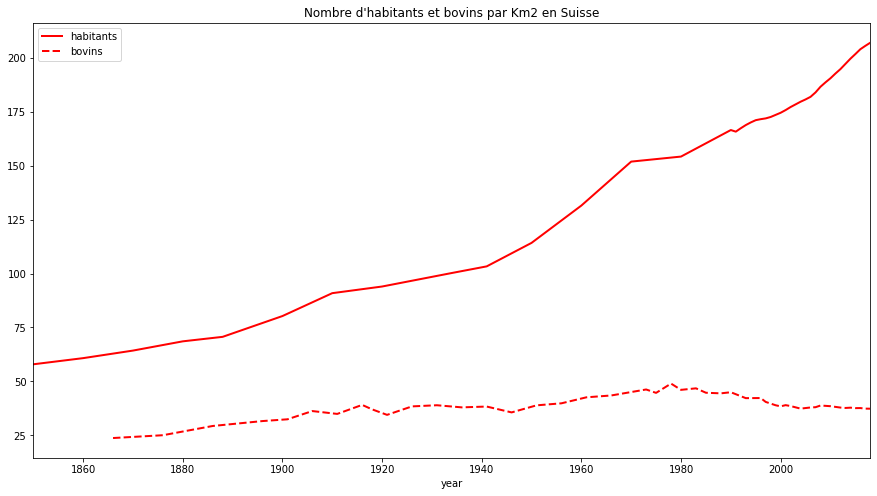

In [79]:
# graphique de population et des bovins par KM2 pour toute la suisse 
fig = plt.figure()
ax = densite_population3['CH'].plot(figsize=(15, 8), lw=2, color='red', title='Nombre d\'habitants et bovins par Km2 en Suisse')
ax2 = densite_bovins3['CH'].plot(figsize=(15, 8), lw=2, style='--', color='red')
ax2.legend(['habitants','bovins'])
plt.show()

<Figure size 432x288 with 0 Axes>

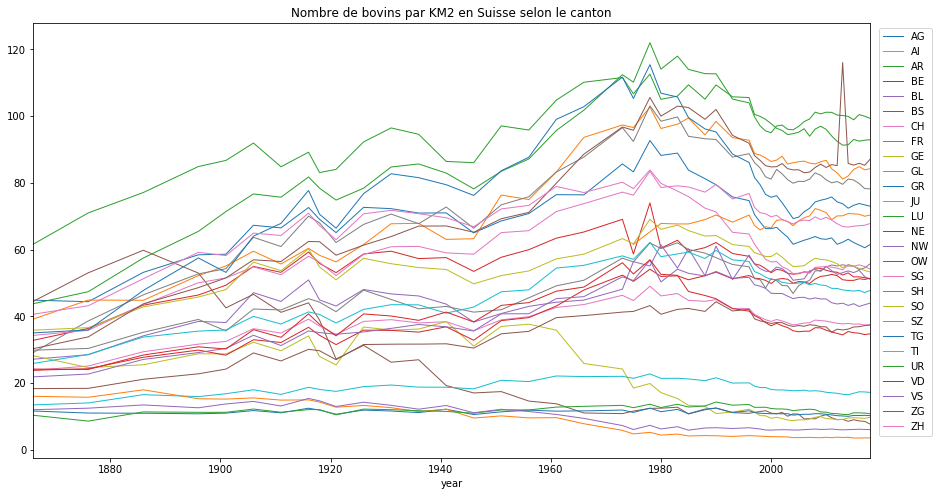

In [80]:
# graphique de population et des bovins par KM2 pour toute la suisse 
fig = plt.figure()
ax = densite_bovins3.plot(figsize=(15, 8), lw=1, title='Nombre de bovins par KM2 en Suisse selon le canton')
ax.legend(loc='upper right', bbox_to_anchor=(1.08, 1), ncol=1)
plt.show()

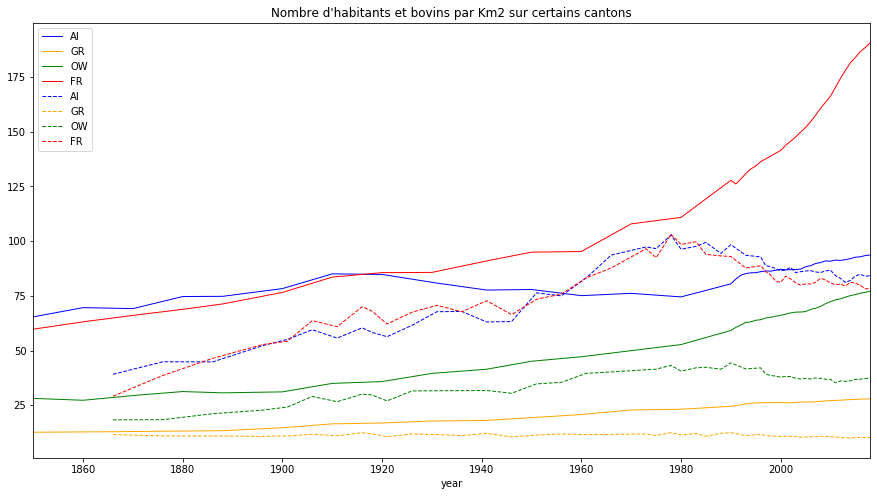

In [81]:
# graphique de population et des bovins pour quelques cantons
# densite_bovins3[['AI', 'GR', 'OW', 'FR']].plot(figsize=(15, 6), lw=2)
ax = densite_population3[['AI', 'GR', 'OW', 'FR']].plot(figsize=(15, 8), lw=1, color=('blue', 'orange', 'green', 'red'), title='Nombre d\'habitants et bovins par Km2 sur certains cantons')
densite_bovins3[['AI', 'GR', 'OW', 'FR']].plot(ax=ax, figsize=(15, 8), lw=1, style='--', color=('blue', 'orange', 'green', 'red'))
plt.show()

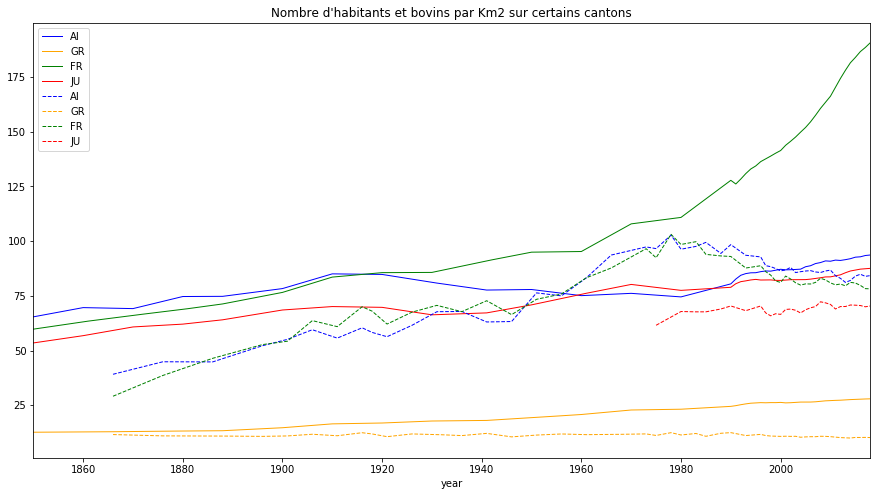

In [96]:
# graphique de population et des bovins pour quelques cantons
ax = densite_population3[['AI', 'GR', 'FR', 'JU']].plot(figsize=(15, 8), lw=1, color=('blue', 'orange', 'green', 'red', 'purple', 'brown'), title='Nombre d\'habitants et bovins par Km2 sur certains cantons')
densite_bovins3[['AI', 'GR', 'FR', 'JU']].plot(ax=ax, figsize=(15, 8), lw=1, style='--', color=('blue', 'orange', 'green', 'red', 'purple', 'brown'))
plt.show()

In [84]:
# tableau avec les valeurs ponctuels
df_densite_bovins_2018 = densite_bovins3.loc[[1866,1918,1978,2018]].transpose()
df_densite_bovins_2018 = df_densite_bovins_2018.apply(pd.to_numeric, errors='coerce')
df_densite_bovins_2018

year,1866,1918,1978,2018
AG,44.829232,69.070124,92.699170,61.499341
AI,39.143802,58.274842,102.732177,84.239225
AR,61.596410,83.076733,112.604973,92.915363
BE,32.776286,55.845219,73.999564,51.230157
BL,27.123653,44.904778,55.085564,51.075830
BS,44.456463,38.858843,12.385073,7.652785
CH,23.785995,37.067269,49.010896,37.377826
FR,29.113242,67.988536,103.083698,78.191543
GE,28.173704,27.957637,19.835647,9.758430
GL,13.433903,18.060196,22.712750,17.170243


In [85]:
# tableau avec les valeurs ponctuels
df_densite_habitants_2018 = densite_population3.loc[[1866,1918,1978,2018]].transpose()
df_densite_habitants_2018 = df_densite_habitants_2018.apply(pd.to_numeric, errors='coerce')
df_densite_habitants_2018

year,1866,1918,1978,2018
AG,140.257132,170.054204,320.104277,483.070622
AI,69.338129,84.825106,74.830327,93.653924
AR,200.118558,230.025523,197.157089,227.375268
BE,73.519046,102.384938,153.173910,173.671343
BL,102.461467,156.854019,418.811373,556.518716
BS,1203.277447,3779.069767,5682.017307,5266.792861
CH,62.900791,93.361061,153.709485,206.937425
FR,64.889641,85.184489,110.244051,190.690272
GE,306.124256,594.294418,1223.972088,1769.198073
GL,50.289599,49.210569,53.988591,58.945479


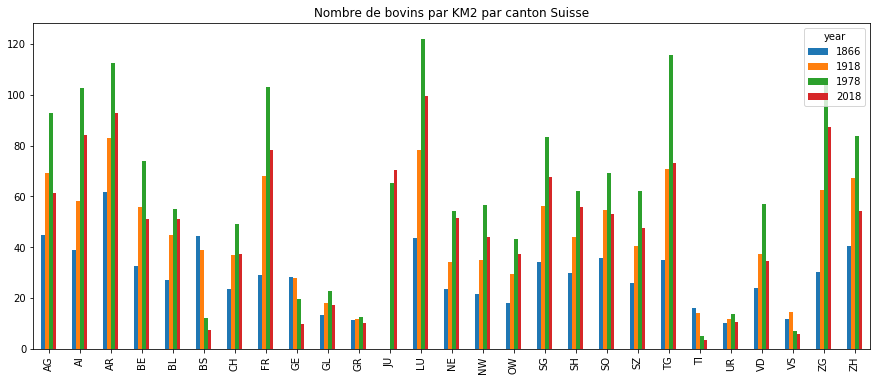

In [87]:
df_densite_bovins_2018.plot(figsize=(15, 6), lw=2, kind='bar', title='Nombre de bovins par KM2 par canton Suisse')

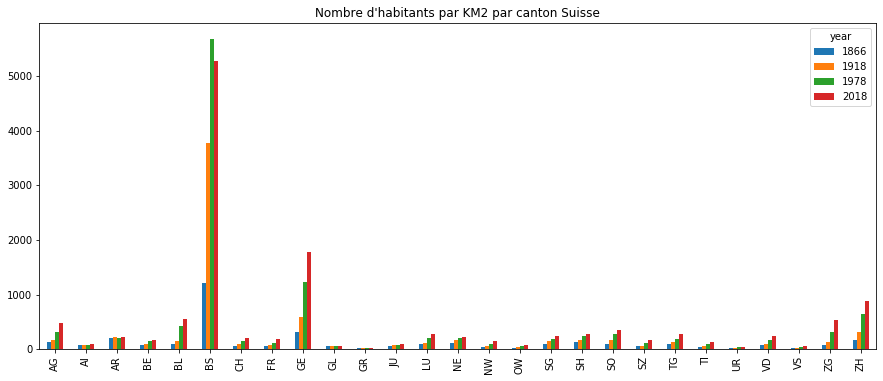

In [88]:
df_densite_habitants_2018.plot(figsize=(15, 6), lw=2, kind='bar', title='Nombre d\'habitants par KM2 par canton Suisse')

In [90]:
# cantons avec plus haute densité de bovins par année
densite_bovins3['canton_max'] = densite_bovins3.idxmax(axis=1)
densite_bovins3['max'] = densite_bovins3.max(axis=1)
densite_bovins3[['canton_max', 'max']]

,canton_max,max
year,,
1866,AR,61.596410
1867,AR,62.535403
1868,AR,63.474395
1869,AR,64.413387
1870,AR,65.352379
1871,AR,66.291372
1872,AR,67.230364
1873,AR,68.169356
1874,AR,69.108348


In [91]:
# cantons avec plus haute densité d'habitants par année
densite_population3['canton_max'] = densite_population3.idxmax(axis=1)
densite_population3['max'] = densite_population3.max(axis=1)
densite_population3[['canton_max', 'max']]

,canton_max,max
year,,
1850,BS,803.082747
1851,BS,832.787994
1852,BS,862.493240
1853,BS,892.198486
1854,BS,921.903732
1855,BS,951.608978
1856,BS,981.314224
1857,BS,1011.019470
1858,BS,1040.724716


In [92]:
# cantons avec valeurs maximales
densite_bovins3['canton_max'].value_counts()

AR    115
LU     37
ZG      1
Name: canton_max, dtype: int64

In [93]:
# cantons avec valeurs maximales
densite_population3['canton_max'].value_counts()

BS    169
Name: canton_max, dtype: int64

In [94]:
# export en CSV du fichier final pour les bovins
densite_bovins3[['canton_max', 'max']].to_csv('export_densite_bovins_par_km2_suisse_1866_2018_canton_max.tsv', sep='\t')
